# GPU Computing Power Distribution and Global Inequality in AI Research

## Research Question
**How is access to GPU computing power distributed across countries, and what does that say about global inequality in AI research and development?**

This notebook analyzes the distribution of GPU computing resources across countries and investigates the relationship between compute capacity, economic factors, and population to understand global inequality in AI research and development.


## Datasets Used

1. **gpu_clusters.csv** - GPU clusters and compute power by country (from Epoch AI)
2. **GDP_countries.csv** - GDP by country (from World Bank)
3. **World_Population.csv** - Population by country
4. **TOP500_202506.csv** - Supercomputer list (from TOP500, includes performance and country)


## Installation Requirements

Before running this notebook, you need to have these packages installed:

```bash
pip install pandas numpy matplotlib seaborn plotly statsmodels
```

Or if using pip3:
```bash
pip3 install pandas numpy matplotlib seaborn plotly statsmodels
```


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try importing plotly with helpful error message
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
except ImportError:
    print("ERROR: plotly is not installed. Please run:")
    print("  pip install plotly")
    print("  or")
    print("  pip3 install plotly")
    raise

# Try importing statsmodels with helpful error message
try:
    import statsmodels.api as sm
except ImportError:
    print("ERROR: statsmodels is not installed. Please run:")
    print("  pip install statsmodels")
    print("  or")
    print("  pip3 install statsmodels")
    raise

import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
# Try different style options for compatibility
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        try:
            plt.style.use('dark_background')
        except:
            plt.style.use('default')
            print("Using default matplotlib style")

sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm

# Basic settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## 1. Load and Clean Data


In [3]:
# Load GPU clusters data
print("Loading gpu_clusters.csv...")
gpu_df = pd.read_csv('gpu_clusters.csv')

# Display basic info
print(f"GPU clusters dataset shape: {gpu_df.shape}")
print(f"\nColumns: {list(gpu_df.columns)}")
print(f"\nFirst few rows:")
gpu_df.head()


Loading gpu_clusters.csv...
GPU clusters dataset shape: (786, 55)

Columns: ['Name', 'Status', 'Certainty', 'Single cluster?', 'Max OP/s (log)', 'H100 equivalents', 'Chip type (primary)', 'Chip quantity (primary)', 'Country', 'Owner', 'First Operational Date', 'Note', 'Sector', 'Power Capacity (MW)', 'Hardware Cost', 'Location', 'Users', 'Hardware note', 'Quote', 'First Operational Date Note', 'Certainty Note', 'Energy Efficiency (log)', 'Builds Upon', 'Superseded by', 'Possible Duplicate', 'Possible Duplicate Of', 'Chip type (secondary)', 'Chip quantity (secondary)', 'Total number of AI chips', 'GPU Supplier (primary)', 'GPU supplier (secondary)', 'Include in Standard Analysis', 'Exclude', 'Rank when first operational', '16-bit OP/s (log)', 'Max OP/s', '8-bit OP/s', '16-bit OP/s', '32-bit OP/s', 'Calculated Power Capacity (MW)', 'Reported Power Capacity (MW)', 'Energy Efficiency', 'Calculated Cost', 'Reported Cost', 'Reported Cost (Inflation adjusted)', 'Cost Quote', 'Noteworthy', 'De

,Name,Status,Certainty,Single cluster?,Max OP/s (log),H100 equivalents,Chip type (primary),Chip quantity (primary),Country,Owner,First Operational Date,Note,Sector,Power Capacity (MW),Hardware Cost,Location,Users,Hardware note,Quote,First Operational Date Note,Certainty Note,Energy Efficiency (log),Builds Upon,Superseded by,Possible Duplicate,Possible Duplicate Of,Chip type (secondary),Chip quantity (secondary),Total number of AI chips,GPU Supplier (primary),GPU supplier (secondary),Include in Standard Analysis,Exclude,Rank when first operational,16-bit OP/s (log),Max OP/s,8-bit OP/s,16-bit OP/s,32-bit OP/s,Calculated Power Capacity (MW),Reported Power Capacity (MW),Energy Efficiency,Calculated Cost,Reported Cost,Reported Cost (Inflation adjusted),Cost Quote,Noteworthy,Decommissioned Date (if applicable),Largest existing cluster when first operational,% of largest cluster when first operational,Source 1,Source 2,Source 3,Source 4,Source 5
0,"""OpenAI/Microsoft Mt Pleasant, Wisconsin Phase 2""",Planned,Likely,Yes,21.544068,1.768570e+06,NVIDIA GB200,700000.0,United States of America,"OpenAI,Microsoft",NaN,Rough estimate of chip count from stated power...,Private,1500.000,NaN,"M39X+XG, Mt Pleasant, WI 53177","OpenAI,Microsoft","GB200,Uncertain","""1.5GW within 2.5 years""\n""Microsoft plans to ...",Planned 2026,They announced Jan 2025 that they are currentl...,12.066947,"OpenAI/Microsoft Mt Pleasant, Wisconsin Phase 1",NaN,NaN,NaN,NaN,NaN,700000.0,NVIDIA,NaN,NaN,NaN,NaN,21.243038,3.500000e+21,3.500000e+21,1.750000e+21,875000000000000000000,1681.680,1500.0,1.166667e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://web.archive.org/web/20240717135010/htt...,https://web.archive.org/web/20240915193816/htt...,https://www.youtube.com/watch?v=hobvps-H38o,NaN,NaN
1,xAI Colossus 2 Memphis Phase 2,Planned,Likely,Yes,21.226935,8.520970e+05,NVIDIA GB200,330000.0,United States of America,xAI,NaN,550k GB200/GB300 planned. Unclear what the pro...,Private,1409.408,NaN,"5420 Tulane Rd, Memphis, TN 38109",xAI,"550k GB200/GB300s,Blackwell,GB200,GB300","At Colossus 2, the first batch of 550k GB200s ...",Planned 2026,NaN,11.989266,xAI Colossus 2 Memphis Phase 1,NaN,NaN,NaN,NVIDIA GB300 (Blackwell Ultra),220000.0,550000.0,NVIDIA,NVIDIA,NaN,NaN,NaN,21.138303,1.686300e+21,1.686300e+21,1.375000e+21,687500000000000000000,1409.408,NaN,9.755869e+11,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,https://archive.ph/oHQSA#selection-585.0-597.43,https://www.cnbc.com/2025/05/20/elon-musk-says...,https://web.archive.org/web/20241205161745/htt...,https://archive.ph/WYQTZ,NaN
2,Meta Prometheus New Albany,Planned,Likely,Yes,21.185542,7.746337e+05,NVIDIA GB200,300000.0,United States of America,Meta AI,NaN,Not sure what the distribution of GB200/GB300 ...,Private,1281.280,NaN,"1 Community Cir, New Albany, OH 43054",Meta,"GB200,GB300","GB200/GB300: 500,000",Planned H2 2026,NaN,11.989266,NaN,NaN,NaN,NaN,NVIDIA GB300 (Blackwell Ultra),200000.0,500000.0,NVIDIA,NVIDIA,NaN,NaN,NaN,21.096910,1.533000e+21,1.533000e+21,1.250000e+21,625000000000000000000,1281.280,NaN,9.755869e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://web.archive.org/web/20250716094956/htt...,NaN,NaN,NaN,NaN
3,Fluidstack France Gigawatt Campus,Planned,Likely,Yes,21.397940,1.263264e+06,NVIDIA GB200,500000.0,France,NaN,NaN,Unclear if the 500k chips refers to GPUs or en...,Public/Private,1000.000,NaN,France,Mistral,"GB200,Uncertain","""France and UAE to invest billions into 1GW Eu...",Planned 2028,NaN,12.096910,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,NVIDIA,NaN,NaN,NaN,NaN,21.096910,2.500000e+21,2.500000e+21,1.250000e+21,625000000000000000000,1201.200,1000.0,1.250000e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://web.archive.org/web/20250211011508/htt...,https://web.archive.org/web/20250210220905/htt...,NaN,NaN,NaN
4,Reliance Industries Supercomputer,Planned,Likely,Yes,21.352183,1.136938e+06,NVIDIA GB200,450000.0,India,Reliance Industries,NaN,Chip count estimated from power capacity. Chip...,Private,1000.000,NaN,"Jamnagar, India","Reliance Jio

In [4]:
# Load GDP data
print("Loading GDP_countries.csv...")
try:
    # CSV file uses semicolon delimiter and has metadata rows to skip
    gdp_df = pd.read_csv('GDP_countries.csv', sep=';', skiprows=4, encoding='utf-8')
    # Handle scientific notation with comma as decimal separator
    # Get the most recent year column (2024 or latest available)
    year_cols = [col for col in gdp_df.columns if str(col).isdigit() and int(col) >= 2000]
    if year_cols:
        latest_year = max([int(col) for col in year_cols])
        # Convert the latest year column, handling scientific notation with comma
        # Replace comma with dot for decimal separator, then convert to numeric
        gdp_df[str(latest_year)] = gdp_df[str(latest_year)].astype(str).str.replace(',', '.', regex=False)
        gdp_df[str(latest_year)] = pd.to_numeric(gdp_df[str(latest_year)], errors='coerce')
except Exception as e:
    print(f"Error loading GDP data: {e}")
    raise

print(f"GDP dataset shape: {gdp_df.shape}")
print(f"\nColumns: {list(gdp_df.columns)}")
print(f"\nFirst few rows:")
gdp_df.head()


Loading GDP_countries.csv...
GDP dataset shape: (266, 29)

Columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

First few rows:


,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1873452514,1896456983,1961843575,2044111732,2254830726,2360017318,2469782682,2677641341,2843024581,2553793296,2453597207,2637859218,2615208380,2727849721,2790849721,2962907263,2983635196,3092429050,3276184358,3395798883,2481857123,2929446578,3279343544,3648573136,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,"2,87202E+11","2,60992E+11","2,67815E+11","3,55716E+11","4,42696E+11","5,16661E+11","5,80241E+11","6,65599E+11","7,13502E+11","7,15485E+11","8,4941E+11","9,45439E+11","9,52998E+11","9,62441E+11","9,78744E+11","8,98309E+11","8,28961E+11","9,73025E+11","1,01229E+12","1,00975E+12","9,33407E+11","1,0856E+12","1,19164E+12","1,13382E+12",1.205970e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,3521418060,2813571754,3825701439,4520946819,5224896719,6203256539,6971758282,9747886187,10109297048,12416152732,15856668556,17805098206,19907329778,20146416758,20497128556,19134221645,18116572395,18753456498,18053222687,18799444490,19955929052,14259995441,14497243872,17152234637,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,"1,4214E+11","1,50058E+11","1,7939E+11","2,07755E+11","2,58567E+11","3,17096E+11","4,02724E+11","4,71538E+11","5,75059E+11","5,15474E+11","6,0628E+11","6,91187E+11","7,48127E+11","8,44203E+11","9,03934E+11","7,78022E+11","7,00028E+11","6,94051E+11","7,7784E+11","8,33289E+11","7,97295E+11","8,58115E+11","8,9364E+11","8,14729E+11",6.700260e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,9129594970,8936079118,15285592370,17812704586,23552057679,36970900884,52381025141,65266415494,88538665085,70307196182,83799474070,"1,1179E+11","1,28053E+11","1,32339E+11","1,35967E+11",90496420507,52761617226,73690154991,79450688259,70897962732,48501561204,66505129988,"1,044E+11",84875162197,8.039694e+10


In [5]:
# Load Population data
print("Loading World_Population.csv...")
try:
    # CSV file uses semicolon delimiter and has metadata rows to skip
    pop_df = pd.read_csv('World_Population.csv', sep=';', skiprows=4, encoding='utf-8')
    # Get the most recent year column (2024)
    year_cols = [col for col in pop_df.columns if col.isdigit() and int(col) >= 2000]
    if year_cols:
        latest_year = max([int(col) for col in year_cols])
except Exception as e:
    print(f"Error loading Population data: {e}")
    raise

print(f"Population dataset shape: {pop_df.shape}")
print(f"\nColumns: {list(pop_df.columns)}")
print(f"\nFirst few rows:")
pop_df.head()


Loading World_Population.csv...
Population dataset shape: (266, 28)

Columns: ['Country Name', 'Country Code', 'Indicator Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

First few rows:


,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population, total",90588.0,91439.0,92074.0,93128.0,95138.0,97635.0,99405.0,100150.0,100917.0,101604.0,101838.0,102591.0,104110.0,105675.0,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0
1,Africa Eastern and Southern,AFE,"Population, total",406156661.0,416807868.0,427820358.0,439173286.0,450928044.0,463076637.0,475606210.0,488580707.0,502070763.0,516003448.0,530308387.0,544737983.0,559609961.0,575202699.0,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0
2,Afghanistan,AFG,"Population, total",20130327.0,20284307.0,21378117.0,22733049.0,23560654.0,24404567.0,25424094.0,25909852.0,26482622.0,27466101.0,28284089.0,29347708.0,30560034.0,31622704.0,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",274968446.0,282780717.0,290841795.0,299142845.0,307725100.0,316588476.0,325663158.0,334984176.0,344586109.0,354343844.0,364358270.0,374790143.0,385360349.0,396030207.0,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,"Population, total",16194869.0,16747208.0,17327699.0,17943712.0,18600423.0,19291161.0,20015279.0,20778561.0,21578655.0,22414773.0,23294825.0,24218352.0,25177394.0,26165620.0,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0


In [6]:
# Load TOP500 supercomputer data
print("Loading TOP500_202506.csv...")
try:
    # CSV file uses semicolon delimiter
    top500_df = pd.read_csv('TOP500_202506.csv', sep=';', encoding='utf-8')
except Exception as e:
    print(f"Error loading TOP500 data: {e}")
    raise

print(f"TOP500 dataset shape: {top500_df.shape}")
print(f"\nColumns: {list(top500_df.columns)}")
print(f"\nFirst few rows:")
top500_df.head()


Loading TOP500_202506.csv...
TOP500 dataset shape: (500, 38)

Columns: ['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name', 'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment', 'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)', 'Power Source', 'Energy Efficiency [GFlops/Watts]', 'Memory', 'Architecture', 'Processor', 'Processor Technology', 'Processor Speed (MHz)', 'Operating System', 'OS Family', 'Accelerator/Co-Processor', 'Cores per Socket', 'Processor Generation', 'System Model', 'System Family', 'Interconnect Family', 'Interconnect', 'Continent', 'Site ID', 'System ID']

First few rows:


,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,Segment,Total Cores,Accelerator/Co-Processor Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Nhalf,HPCG [TFlop/s],Power (kW),Power Source,Energy Efficiency [GFlops/Watts],Memory,Architecture,Processor,Processor Technology,Processor Speed (MHz),Operating System,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,1.0,64,1,El Capitan,"HPE Cray EX255a, AMD 4th Gen EPYC 24C 1.8GHz, ...",DOE/NNSA/LLNL,HPE,United States,2024,Research,11 039 616,9 988 224,"1 742 000,00","2 746 376,09",25 446 528,NaN,"17 406,90","29 580,98",Submitted,"58,89",NaN,MPP,AMD 4th Gen EPYC 24C 1.8GHz,AMD Zen-4 (Genoa),1 800,TOSS,Linux,AMD Instinct MI300A,24,AMD Zen-4 (Genoa),HPE Cray EX255a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,49 763,180307
1,2,2.0,59,1,Frontier,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,Research,9 066 176,8 451 520,"1 353 000,00","2 055 716,99",24 837 120,NaN,"14 054,00","24 607,00",Submitted,"54,98",NaN,MPP,AMD Optimized 3rd Generation EPYC 64C 2GHz,AMD Zen-3 (Milan),2 000,HPE Cray OS,Linux,AMD Instinct MI250X,64,AMD Zen-3 (Milan),HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,48 553,180047
2,3,3.0,62,2,Aurora,"HPE Cray EX - Intel Exascale Compute Blade, Xe...",DOE/SC/Argonne National Laboratory,Intel,United States,2023,Research,9 264 128,8 159 232,"1 012 000,00","1 980 006,00",28 773 888,NaN,"5 612,60","38 698,36",Submitted,"26,15",NaN,MPP,Xeon CPU Max 9470 52C 2.4GHz,Intel Sapphire Rapids,2 400,SUSE Linux Enterprise Server 15 SP4,Linux,Intel Data Center GPU Max,52,Intel Xeon Max,HPE Cray EX - Intel Exascale Compute Blade,HPE Cray EX - Intel Exascale Compute Blade,Gigabit Ethernet,Slingshot-11,North America,47 347,180183
3,4,NaN,65,4,JUPITER Booster,"BullSequana XH3000, GH Superchip 72C 3GHz, NVI...",EuroHPC/FZJ,EVIDEN,Germany,2025,Research,4 801 344,3 106 752,"793 400,00","930 000,00",19 668 992,NaN,NaN,"13 088,23",Submitted,"60,62",NaN,Cluster,GH Superchip 72C 3GHz,NVIDIA Grace CPU,3 000,RedHat Enterprise Linux,Linux,NVIDIA GH200 Superchip,72,NVIDIA Grace,BullSequana XH3000,EVIDEN BullSequana,Infiniband,Quad-Rail NVIDIA InfiniBand NDR200,Europe,51 016,180357
4,5,4.0,62,3,Eagle,"Microsoft NDv5, Xeon Platinum 8480C 48C 2GHz, ...",Microsoft Azure,Microsoft Azure,United States,2023,Industry,2 073 600,1 900 800,"561 200,00","846 835,20",11 796 480,NaN,NaN,NaN,NaN,NaN,NaN,Cluster,Xeon Platinum 8480C 48C 2GHz,Intel Sapphire Rapids,2 000,Ubuntu 22.04,Linux,NVIDIA H100,48,Xeon Platinum (Sapphire Rapids),Microsoft NDv5,Microsoft Azure Cluster,Infiniband,NVIDIA Infiniband NDR,North America,50 981,180236


### Clean and Standardize Country Names

We need to standardize country names across all datasets to enable proper merging, a critical step for data quality.


In [7]:
# Function to standardize country names
def standardize_country_name(name):
    """
    Standardize country names to common format.
    Handles common variations and special cases.
    """
    if pd.isna(name):
        return None
    
    name = str(name).strip()
    
    # Common country name mappings
    mappings = {
        'United States of America': 'United States',
        'USA': 'United States',
        'U.S.A.': 'United States',
        'US': 'United States',
        'United Kingdom': 'United Kingdom',
        'UK': 'United Kingdom',
        'U.K.': 'United Kingdom',
        'Russian Federation': 'Russia',
        'Russian Fed.': 'Russia',
        'South Korea': 'Korea, Rep.',
        'Korea, South': 'Korea, Rep.',
        'Republic of Korea': 'Korea, Rep.',
        'United Arab Emirates': 'United Arab Emirates',
        'UAE': 'United Arab Emirates',
    }
    
    if name in mappings:
        return mappings[name]
    
    return name

# Apply standardization to all datasets
print("Standardizing country names...")

# Identify country column in each dataset
# We'll need to inspect and identify the correct column names first
print("\nUnique countries in GPU clusters:")
if 'Country' in gpu_df.columns:
    print(f"Found {gpu_df['Country'].nunique()} unique countries")
    print(gpu_df['Country'].unique()[:20])


Standardizing country names...

Unique countries in GPU clusters:
Found 37 unique countries
['United States of America' 'France' 'India' 'United Arab Emirates' nan
 'Korea (Republic of)'
 'United Kingdom of Great Britain and Northern Ireland' 'China' 'Finland'
 'Saudi Arabia' 'Malaysia' 'Germany' 'Taiwan' 'Norway' 'Japan'
 'Switzerland' 'Italy' 'Singapore' 'Iceland' 'Spain']


In [8]:
# Process GPU clusters data
# Extract relevant columns and aggregate by country
print("Processing GPU clusters data...")

# Check what columns we have for compute metrics
compute_cols = [col for col in gpu_df.columns if 'OP/s' in col or 'FLOPS' in col or 'FLOP' in col or 'H100' in col]
print(f"Compute-related columns: {compute_cols}")

# Use Max OP/s as primary compute metric (convert from log if needed)
if 'Max OP/s' in gpu_df.columns:
    gpu_df['total_flops'] = gpu_df['Max OP/s']
elif 'Max OP/s (log)' in gpu_df.columns:
    # Convert from log scale
    gpu_df['total_flops'] = 10 ** gpu_df['Max OP/s (log)']
elif '16-bit OP/s' in gpu_df.columns:
    gpu_df['total_flops'] = gpu_df['16-bit OP/s']
else:
    # Fallback: use H100 equivalents and convert to approximate FLOPS
    # H100 has approximately 1e18 FLOPS (1 exaflop)
    if 'H100 equivalents' in gpu_df.columns:
        gpu_df['total_flops'] = gpu_df['H100 equivalents'] * 1e18
    else:
        gpu_df['total_flops'] = 0

# Filter to only existing/operational clusters (exclude planned)
if 'Status' in gpu_df.columns:
    gpu_operational = gpu_df[gpu_df['Status'].isin(['Existing', 'Operational'])]
    print(f"Operational clusters: {len(gpu_operational)} out of {len(gpu_df)} total")
else:
    gpu_operational = gpu_df.copy()

# Aggregate by country
agg_dict = {'total_flops': 'sum'}
if 'H100 equivalents' in gpu_operational.columns:
    agg_dict['H100 equivalents'] = 'sum'

gpu_by_country = gpu_operational.groupby('Country').agg(agg_dict).reset_index()

gpu_by_country.columns = ['country', 'total_flops', 'h100_equivalents']
gpu_by_country['country'] = gpu_by_country['country'].apply(standardize_country_name)

print(f"\nGPU data aggregated to {len(gpu_by_country)} countries")
gpu_by_country.head()


Processing GPU clusters data...
Compute-related columns: ['Max OP/s (log)', 'H100 equivalents', '16-bit OP/s (log)', 'Max OP/s', '8-bit OP/s', '16-bit OP/s', '32-bit OP/s']
Operational clusters: 609 out of 786 total

GPU data aggregated to 37 countries


,country,total_flops,h100_equivalents
0,Australia,1.260736e+18,637.057100
1,Brazil,2.477080e+18,1251.682668
2,Canada,6.151728e+18,3108.503285
3,China,4.678690e+20,231251.000000
4,Czechia,3.594240e+17,181.618999


In [9]:
# Process TOP500 supercomputer data
print("Processing TOP500 supercomputer data...")

# Check if top500_df exists
if 'top500_df' not in globals() or top500_df.empty:
    print("Warning: TOP500 data not loaded. Creating empty dataframe.")
    top500_by_country = pd.DataFrame(columns=['country', 'top500_flops'])
else:
    # Identify country and performance columns
    # CSV uses "Country" and "Rpeak [TFlop/s]"
    country_col = None
    perf_col = None

    for col in top500_df.columns:
        col_lower = str(col).lower()
        if 'country' in col_lower:
            country_col = col
        if 'rpeak' in col_lower or ('tflop' in col_lower and 's' in col_lower):
            perf_col = col

    print(f"Country column: {country_col}")
    print(f"Performance column: {perf_col}")

    if country_col and perf_col:
        # Clean the performance column - handle comma as decimal separator and spaces
        # Convert to string, replace comma with dot, remove spaces, then convert to numeric
        top500_df[perf_col] = top500_df[perf_col].astype(str)
        top500_df[perf_col] = top500_df[perf_col].str.replace(',', '.', regex=False)  # Decimal separator
        top500_df[perf_col] = top500_df[perf_col].str.replace(' ', '', regex=False)  # Remove thousand separators
        top500_df[perf_col] = pd.to_numeric(top500_df[perf_col], errors='coerce')
        
        top500_by_country = top500_df.groupby(country_col)[perf_col].sum().reset_index()
        top500_by_country.columns = ['country', 'top500_tflops']
        top500_by_country['country'] = top500_by_country['country'].apply(standardize_country_name)
        # Convert TFLOPS to FLOPS (multiply by 1e12)
        top500_by_country['top500_flops'] = top500_by_country['top500_tflops'] * 1e12
        top500_by_country = top500_by_country[['country', 'top500_flops']]
    else:
        # Fallback: count supercomputers per country
        if country_col:
            top500_by_country = top500_df.groupby(country_col).size().reset_index()
            top500_by_country.columns = ['country', 'top500_count']
            top500_by_country['country'] = top500_by_country['country'].apply(standardize_country_name)
            top500_by_country['top500_flops'] = top500_by_country['top500_count'] * 1e15  # Approximate
        else:
            top500_by_country = pd.DataFrame(columns=['country', 'top500_flops'])

print(f"\nTOP500 data aggregated to {len(top500_by_country)} countries")
if not top500_by_country.empty:
    top500_by_country.head()
else:
    print("No TOP500 data available")


Processing TOP500 supercomputer data...
Country column: Country
Performance column: HPCG [TFlop/s]

TOP500 data aggregated to 41 countries


In [10]:
# Process GDP data
print("Processing GDP data...")

# Check if gdp_df exists
if 'gdp_df' not in globals() or gdp_df.empty:
    print("Warning: GDP data not loaded. Creating empty dataframe.")
    gdp_clean = pd.DataFrame(columns=['country', 'gdp'])
else:
    # Identify country and GDP columns
    # CSV uses "Country Name" and year columns
    gdp_country_col = None
    gdp_value_col = None

    for col in gdp_df.columns:
        col_lower = str(col).lower()
        if 'country' in col_lower and 'name' in col_lower:
            gdp_country_col = col
        # Look for year columns (2024, 2023, etc.)
        if col.isdigit() and int(col) >= 2000:
            gdp_value_col = col

    # If no GDP column found, look for the most recent year column
    if not gdp_value_col:
        # Look for numeric columns that might be years
        numeric_cols = [col for col in gdp_df.columns if str(col).strip().isdigit() and int(str(col).strip()) >= 2000]
        if len(numeric_cols) > 0:
            gdp_value_col = max(numeric_cols, key=lambda x: int(str(x).strip()))  # Use the most recent year

    print(f"GDP country column: {gdp_country_col}")
    print(f"GDP value column: {gdp_value_col}")

    if gdp_country_col and gdp_value_col:
        # Ensure we have the columns before accessing
        if gdp_country_col in gdp_df.columns and gdp_value_col in gdp_df.columns:
            gdp_clean = gdp_df[[gdp_country_col, gdp_value_col]].copy()
            gdp_clean.columns = ['country', 'gdp']
            gdp_clean['country'] = gdp_clean['country'].apply(standardize_country_name)
            # Remove rows with missing GDP
            gdp_clean = gdp_clean.dropna(subset=['gdp'])
            # Convert GDP to numeric, handling any remaining issues
            gdp_clean['gdp'] = pd.to_numeric(gdp_clean['gdp'], errors='coerce')
            gdp_clean = gdp_clean.dropna(subset=['gdp'])
            # GDP is already in current US$, so no conversion needed
        else:
            print(f"Warning: Could not find required columns in GDP data")
            gdp_clean = pd.DataFrame(columns=['country', 'gdp'])
    else:
        gdp_clean = pd.DataFrame(columns=['country', 'gdp'])

print(f"\nGDP data for {len(gdp_clean)} countries")
if not gdp_clean.empty:
    gdp_clean.head()
else:
    print("No GDP data available")


Processing GDP data...
GDP country column: Country Name
GDP value column: 2024

GDP data for 231 countries


In [11]:
# Process Population data
print("Processing Population data...")

# Check if pop_df exists
if 'pop_df' not in globals() or pop_df.empty:
    print("Warning: Population data not loaded. Creating empty dataframe.")
    pop_clean = pd.DataFrame(columns=['country', 'population'])
else:
    # Identify country and population columns
    # CSV uses "Country Name" and year columns
    pop_country_col = None
    pop_value_col = None

    for col in pop_df.columns:
        col_lower = str(col).lower()
        if 'country' in col_lower and 'name' in col_lower:
            pop_country_col = col
        # Look for year columns (2024, 2023, etc.)
        if col.isdigit() and int(col) >= 2000:
            pop_value_col = col

    # If no population column found, look for the most recent year column
    if not pop_value_col:
        numeric_cols = [col for col in pop_df.columns if str(col).strip().isdigit() and int(str(col).strip()) >= 2000]
        if len(numeric_cols) > 0:
            pop_value_col = max(numeric_cols, key=lambda x: int(str(x).strip()))  # Use the most recent year

    print(f"Population country column: {pop_country_col}")
    print(f"Population value column: {pop_value_col}")

    if pop_country_col and pop_value_col:
        # Ensure we have the columns before accessing
        if pop_country_col in pop_df.columns and pop_value_col in pop_df.columns:
            pop_clean = pop_df[[pop_country_col, pop_value_col]].copy()
            pop_clean.columns = ['country', 'population']
            pop_clean['country'] = pop_clean['country'].apply(standardize_country_name)
            pop_clean = pop_clean.dropna(subset=['population'])
            # Convert to numeric
            pop_clean['population'] = pd.to_numeric(pop_clean['population'], errors='coerce')
            pop_clean = pop_clean.dropna(subset=['population'])
        else:
            print(f"Warning: Could not find required columns in Population data")
            pop_clean = pd.DataFrame(columns=['country', 'population'])
    else:
        pop_clean = pd.DataFrame(columns=['country', 'population'])

print(f"\nPopulation data for {len(pop_clean)} countries")
if not pop_clean.empty:
    pop_clean.head()
else:
    print("No Population data available")


Processing Population data...
Population country column: Country Name
Population value column: 2024

Population data for 265 countries


## 2. Merge Datasets


In [12]:
# Merge all datasets on country
print("Merging datasets...")

# Start with GPU data as base
merged_df = gpu_by_country.copy()

# Merge TOP500 data
if not top500_by_country.empty:
    merged_df = merged_df.merge(top500_by_country, on='country', how='outer')
    # Combine compute from both sources
    merged_df['total_flops'] = merged_df['total_flops'].fillna(0) + merged_df['top500_flops'].fillna(0)
    merged_df = merged_df.drop(columns=['top500_flops'], errors='ignore')
else:
    print("Warning: TOP500 data not available")

# Merge GDP data
if not gdp_clean.empty:
    merged_df = merged_df.merge(gdp_clean, on='country', how='outer')
else:
    merged_df['gdp'] = np.nan
    print("Warning: GDP data not available")

# Merge Population data
if not pop_clean.empty:
    merged_df = merged_df.merge(pop_clean, on='country', how='outer')
else:
    merged_df['population'] = np.nan
    print("Warning: Population data not available")

print(f"\nMerged dataset shape: {merged_df.shape}")
print(f"Countries with GPU data: {merged_df['total_flops'].notna().sum()}")
print(f"Countries with GDP data: {merged_df['gdp'].notna().sum()}")
print(f"Countries with Population data: {merged_df['population'].notna().sum()}")

merged_df.head(10)


Merging datasets...

Merged dataset shape: (272, 5)
Countries with GPU data: 48
Countries with GDP data: 231
Countries with Population data: 265


,country,total_flops,h100_equivalents,gdp,population
0,Afghanistan,NaN,NaN,NaN,42647492.0
1,Africa Eastern and Southern,NaN,NaN,1.205970e+12,769294618.0
2,Africa Western and Central,NaN,NaN,6.700260e+11,521764076.0
3,Albania,NaN,NaN,2.717774e+10,2714617.0
4,Algeria,NaN,NaN,2.636200e+11,46814308.0
5,American Samoa,NaN,NaN,NaN,46765.0
6,Andorra,NaN,NaN,4.039844e+09,81938.0
7,Angola,NaN,NaN,8.039694e+10,37885849.0
8,Antigua and Barbuda,NaN,NaN,2.224815e+09,93772.0
9,Arab World,NaN,NaN,3.704770e+12,492579811.0


In [13]:
# Calculate derived metrics
print("Calculating derived metrics...")

# Fill missing values with 0 for compute (countries with no compute)
merged_df['total_flops'] = merged_df['total_flops'].fillna(0)

# Calculate compute per capita and per GDP
# Handle division by zero
merged_df['compute_per_capita'] = np.where(
    merged_df['population'] > 0,
    merged_df['total_flops'] / merged_df['population'],
    np.nan
)

merged_df['compute_per_gdp'] = np.where(
    merged_df['gdp'] > 0,
    merged_df['total_flops'] / merged_df['gdp'],
    np.nan
)

# Drop rows with missing critical values (GDP or Population)
# But keep countries with compute even if GDP/population missing for visualization
merged_df_clean = merged_df[
    (merged_df['gdp'].notna()) & 
    (merged_df['population'].notna()) &
    (merged_df['total_flops'] >= 0)
].copy()

print(f"Countries with complete data: {len(merged_df_clean)}")

# Display summary statistics
print("\nSummary Statistics:")
print(merged_df_clean[['total_flops', 'gdp', 'population', 'compute_per_capita', 'compute_per_gdp']].describe())

merged_df_clean.head(10)


Calculating derived metrics...
Countries with complete data: 231

Summary Statistics:
        total_flops           gdp    population  compute_per_capita  \
count  2.310000e+02  2.310000e+02  2.310000e+02        2.310000e+02   
mean   1.543368e+19  3.961173e+12  3.790772e+08        2.434271e+11   
std    1.840534e+20  1.274746e+13  1.086610e+09        1.862424e+12   
min    0.000000e+00  1.603506e+08  1.194700e+04        0.000000e+00   
25%    0.000000e+00  1.946921e+10  2.959093e+06        0.000000e+00   
50%    0.000000e+00  9.319733e+10  1.296916e+07        0.000000e+00   
75%    0.000000e+00  1.169135e+12  1.005189e+08        0.000000e+00   
max    2.760011e+21  1.112530e+14  8.142056e+09        2.562952e+13   

       compute_per_gdp  
count     2.310000e+02  
mean      3.321973e+06  
std       2.273517e+07  
min       0.000000e+00  
25%       0.000000e+00  
50%       0.000000e+00  
75%       0.000000e+00  
max       3.098951e+08  


,country,total_flops,h100_equivalents,gdp,population,compute_per_capita,compute_per_gdp
1,Africa Eastern and Southern,0.0,NaN,1.205970e+12,769294618.0,0.0,0.0
2,Africa Western and Central,0.0,NaN,6.700260e+11,521764076.0,0.0,0.0
3,Albania,0.0,NaN,2.717774e+10,2714617.0,0.0,0.0
4,Algeria,0.0,NaN,2.636200e+11,46814308.0,0.0,0.0
6,Andorra,0.0,NaN,4.039844e+09,81938.0,0.0,0.0
7,Angola,0.0,NaN,8.039694e+10,37885849.0,0.0,0.0
8,Antigua and Barbuda,0.0,NaN,2.224815e+09,93772.0,0.0,0.0
9,Arab World,0.0,NaN,3.704770e+12,492579811.0,0.0,0.0
10,Argentina,0.0,NaN,6.332670e+11,45696159.0,0.0,0.0
11,Armenia,0.0,NaN,2.578659e+10,3033500.0,0.0,0.0


## 3. Analysis: Gini Coefficient and Lorenz Curve

The Gini coefficient measures inequality in the distribution of compute power. A value of 0 represents perfect equality, while 1 represents perfect inequality.


In [14]:
# Calculate Gini coefficient for compute power distribution
def calculate_gini(array):
    """
    Calculate Gini coefficient for inequality measurement.
    Gini coefficient ranges from 0 (perfect equality) to 1 (perfect inequality).
    """
    array = np.array(array)
    array = array[array >= 0]  # Remove negative values
    if len(array) == 0:
        return np.nan
    array = np.sort(array)
    n = len(array)
    index = np.arange(1, n + 1)
    return (2 * np.sum((index) * array)) / (n * np.sum(array)) - (n + 1) / n

# Calculate Gini for total compute power
compute_values = merged_df_clean['total_flops'].values
gini_compute = calculate_gini(compute_values)

print(f"Gini Coefficient for Compute Power Distribution: {gini_compute:.4f}")
print(f"\nInterpretation:")
if gini_compute < 0.3:
    print("Low inequality - compute power is relatively evenly distributed")
elif gini_compute < 0.5:
    print("Moderate inequality - some concentration of compute power")
elif gini_compute < 0.7:
    print("High inequality - significant concentration of compute power")
else:
    print("Very high inequality - extreme concentration of compute power in few countries")

# Calculate cumulative shares for Lorenz curve
sorted_compute = np.sort(compute_values)
cumulative_compute = np.cumsum(sorted_compute)
cumulative_compute_pct = cumulative_compute / cumulative_compute[-1] if cumulative_compute[-1] > 0 else cumulative_compute

# Population share (assuming equal population per country for this analysis)
n = len(sorted_compute)
population_share = np.arange(1, n + 1) / n

print(f"\nTop 10 countries by compute power:")
top_10 = merged_df_clean.nlargest(10, 'total_flops')[['country', 'total_flops']]
for idx, row in top_10.iterrows():
    print(f"{row['country']}: {row['total_flops']:.2e} FLOPS")


Gini Coefficient for Compute Power Distribution: 0.9887

Interpretation:
Very high inequality - extreme concentration of compute power in few countries

Top 10 countries by compute power:
United States: 2.76e+21 FLOPS
China: 4.68e+20 FLOPS
Germany: 5.16e+19 FLOPS
Norway: 4.05e+19 FLOPS
Japan: 3.74e+19 FLOPS
France: 3.64e+19 FLOPS
Switzerland: 3.41e+19 FLOPS
Finland: 2.34e+19 FLOPS
Saudi Arabia: 1.66e+19 FLOPS
Italy: 1.63e+19 FLOPS


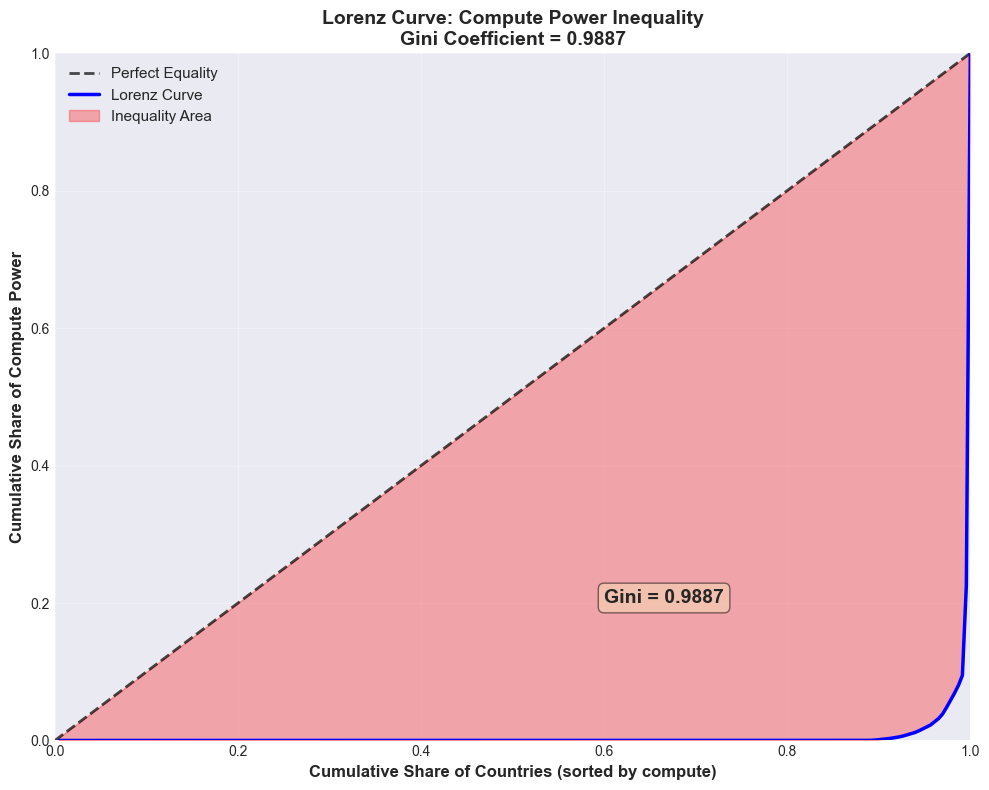


The area between the Lorenz curve and the line of perfect equality represents the Gini coefficient.
A Gini coefficient of 0.9887 indicates very high inequality.


In [15]:
# Create Lorenz Curve
fig, ax = plt.subplots(figsize=(10, 8))

# Perfect equality line
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Perfect Equality', alpha=0.7)

# Lorenz curve
ax.plot(population_share, cumulative_compute_pct, 'b-', linewidth=2.5, label='Lorenz Curve')

# Fill area between curves
ax.fill_between(population_share, population_share, cumulative_compute_pct, 
                alpha=0.3, color='red', label='Inequality Area')

ax.set_xlabel('Cumulative Share of Countries (sorted by compute)', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Share of Compute Power', fontsize=12, fontweight='bold')
ax.set_title(f'Lorenz Curve: Compute Power Inequality\nGini Coefficient = {gini_compute:.4f}', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Add text annotation
ax.text(0.6, 0.2, f'Gini = {gini_compute:.4f}', 
        fontsize=14, fontweight='bold', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nThe area between the Lorenz curve and the line of perfect equality represents the Gini coefficient.")
print(f"A Gini coefficient of {gini_compute:.4f} indicates {'very high' if gini_compute > 0.7 else 'high' if gini_compute > 0.5 else 'moderate' if gini_compute > 0.3 else 'low'} inequality.")


## 4. Linear Regression Analysis

We'll model AI capacity (compute power) as a function of GDP and population to understand the drivers of compute power distribution.


In [16]:
# Prepare data for regression
# Use log-transformed variables for better model fit (compute power has exponential distribution)
regression_data = merged_df_clean.copy()

# Create log-transformed variables (add small constant to avoid log(0))
regression_data['log_compute'] = np.log1p(regression_data['total_flops'])
regression_data['log_gdp'] = np.log1p(regression_data['gdp'])
regression_data['log_population'] = np.log1p(regression_data['population'])

# Use compute_per_capita as the dependent variable (proxy for AI capacity per person)
regression_data['log_compute_per_capita'] = np.log1p(regression_data['compute_per_capita'])

# Drop rows with missing values
regression_data = regression_data.dropna(subset=['log_compute', 'log_gdp', 'log_population', 'compute_per_capita'])

print(f"Regression dataset: {len(regression_data)} countries")
print(f"\nVariables:")
print(f"  - Dependent: log(compute_per_capita)")
print(f"  - Independent: log(GDP), log(Population)")

regression_data[['country', 'total_flops', 'gdp', 'population', 'compute_per_capita']].head()


Regression dataset: 231 countries

Variables:
  - Dependent: log(compute_per_capita)
  - Independent: log(GDP), log(Population)


,country,total_flops,gdp,population,compute_per_capita
1,Africa Eastern and Southern,0.0,1.205970e+12,769294618.0,0.0
2,Africa Western and Central,0.0,6.700260e+11,521764076.0,0.0
3,Albania,0.0,2.717774e+10,2714617.0,0.0
4,Algeria,0.0,2.636200e+11,46814308.0,0.0
6,Andorra,0.0,4.039844e+09,81938.0,0.0


In [17]:
# Fit linear regression model
# Model: compute_per_capita ~ GDP + Population

# Prepare features and target
X = regression_data[['log_gdp', 'log_population']]
X = sm.add_constant(X)  # Add intercept term
y = regression_data['log_compute_per_capita']

# Fit the model
model = sm.OLS(y, X).fit()

# Print regression results
print("=" * 80)
print("LINEAR REGRESSION RESULTS")
print("=" * 80)
print(model.summary())
print("\n" + "=" * 80)

# Extract key statistics
print(f"\nKey Findings:")
print(f"  R-squared: {model.rsquared:.4f}")
print(f"  Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"  P-value (F-statistic): {model.f_pvalue:.4e}")

if model.f_pvalue < 0.05:
    print(f"  ✓ Model is statistically significant (p < 0.05)")
else:
    print(f"  ✗ Model is not statistically significant (p >= 0.05)")

print(f"\nCoefficients:")
for param, value in model.params.items():
    pvalue = model.pvalues[param]
    significance = "***" if pvalue < 0.001 else "**" if pvalue < 0.01 else "*" if pvalue < 0.05 else ""
    print(f"  {param}: {value:.4f} {significance} (p={pvalue:.4f})")


LINEAR REGRESSION RESULTS
                              OLS Regression Results                              
Dep. Variable:     log_compute_per_capita   R-squared:                       0.229
Model:                                OLS   Adj. R-squared:                  0.222
Method:                     Least Squares   F-statistic:                     33.88
Date:                    Sun, 16 Nov 2025   Prob (F-statistic):           1.31e-13
Time:                            23:07:46   Log-Likelihood:                -798.77
No. Observations:                     231   AIC:                             1604.
Df Residuals:                         228   BIC:                             1614.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------


CORRELATION ANALYSIS

Correlation Matrix:
                    total_flops     gdp  population  compute_per_capita  \
total_flops              1.0000  0.1407      0.0060              0.2863   
gdp                      0.1407  1.0000      0.7518              0.0072   
population               0.0060  0.7518      1.0000             -0.0381   
compute_per_capita       0.2863  0.0072     -0.0381              1.0000   
compute_per_gdp          0.2833  0.0079     -0.0374              0.9933   

                    compute_per_gdp  
total_flops                  0.2833  
gdp                          0.0079  
population                  -0.0374  
compute_per_capita           0.9933  
compute_per_gdp              1.0000  


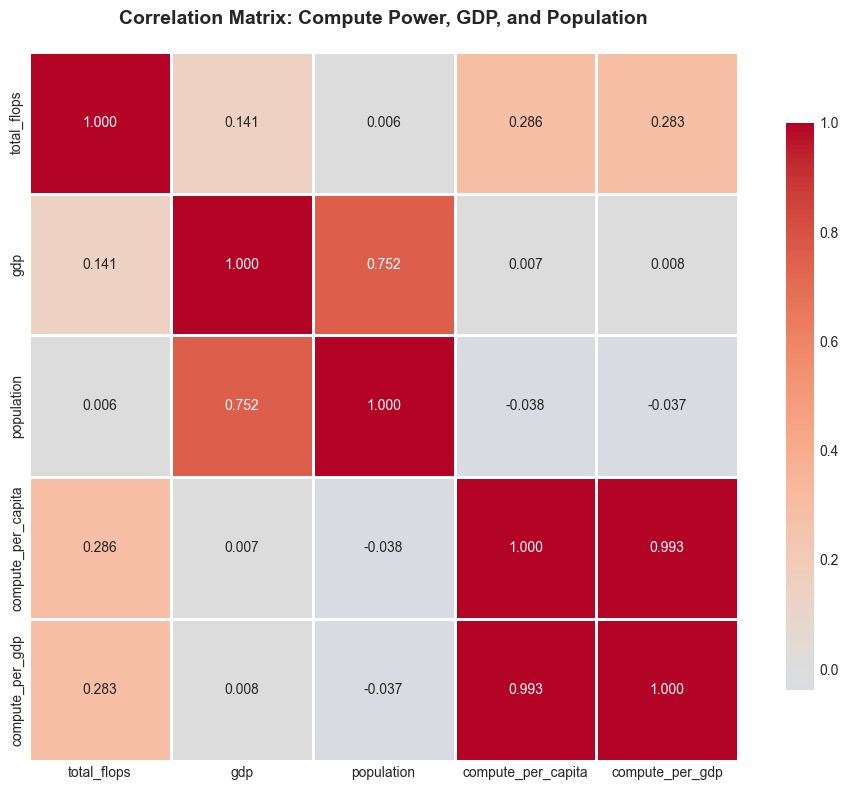


Key Correlations:
  Compute Power vs GDP: 0.1407
  Compute Power vs Population: 0.0060
  Compute per Capita vs GDP: 0.0072
  Compute per Capita vs Population: -0.0381


In [18]:
# Calculate correlations
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

correlation_vars = ['total_flops', 'gdp', 'population', 'compute_per_capita', 'compute_per_gdp']
corr_data = merged_df_clean[correlation_vars].corr()

print("\nCorrelation Matrix:")
print(corr_data.round(4))

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix: Compute Power, GDP, and Population', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print key correlations
print(f"\nKey Correlations:")
print(f"  Compute Power vs GDP: {corr_data.loc['total_flops', 'gdp']:.4f}")
print(f"  Compute Power vs Population: {corr_data.loc['total_flops', 'population']:.4f}")
print(f"  Compute per Capita vs GDP: {corr_data.loc['compute_per_capita', 'gdp']:.4f}")
print(f"  Compute per Capita vs Population: {corr_data.loc['compute_per_capita', 'population']:.4f}")


## 5. Visualizations

### 5.1 Choropleth Map: Global Compute Power per Capita


In [19]:
# Create choropleth map using plotly
# Prepare data for mapping
map_data = merged_df_clean[['country', 'compute_per_capita', 'total_flops']].copy()
map_data = map_data[
    (map_data['compute_per_capita'] > 0) & 
    (map_data['country'].notna())
].copy()  # Only countries with compute and valid country names

if len(map_data) == 0:
    print("Warning: No data available for choropleth map")
else:
    # Create choropleth map
    try:
        fig = px.choropleth(
            map_data,
            locations='country',
            locationmode='country names',
            color='compute_per_capita',
            hover_name='country',
            hover_data={'total_flops': ':,.2e', 'compute_per_capita': ':,.2e'},
            color_continuous_scale='Viridis',
            title='Global GPU Compute Power per Capita',
            labels={'compute_per_capita': 'Compute per Capita (FLOPS)'}
        )

        fig.update_layout(
            title={
                'text': 'Global Distribution of GPU Compute Power per Capita',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 16, 'color': 'black'}
            },
            geo=dict(
                showframe=False,
                showcoastlines=True,
                projection_type='natural earth'
            ),
            height=600,
            margin=dict(l=0, r=0, t=50, b=0)
        )

        fig.show()
        print("Choropleth map created. Darker colors indicate higher compute power per capita.")
    except Exception as e:
        print(f"Error creating choropleth map: {e}")
        print("This may be due to country name mismatches. Some countries may not be recognized by plotly.")


Choropleth map created. Darker colors indicate higher compute power per capita.


### 5.2 Scatterplot: Compute per Capita vs GDP


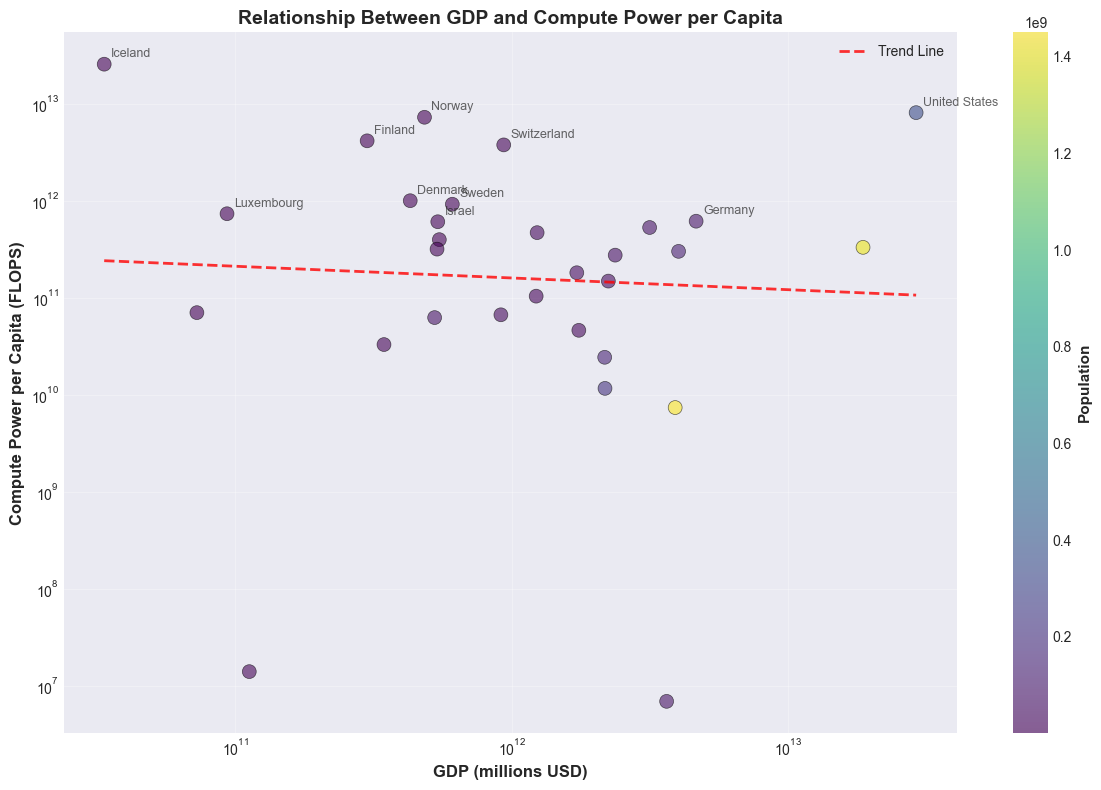


Scatterplot shows relationship between GDP and compute power per capita.
Bubble size represents population. Top 10 countries by compute per capita are labeled.


In [20]:
# Create scatterplot with regression line
fig, ax = plt.subplots(figsize=(12, 8))

# Filter data for plotting (only countries with compute > 0 for better visualization)
plot_data = merged_df_clean[
    (merged_df_clean['compute_per_capita'] > 0) & 
    (merged_df_clean['gdp'] > 0) &
    (merged_df_clean['population'] > 0)
].copy()

if len(plot_data) == 0:
    print("Warning: No data available for scatterplot")
    ax.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax.transAxes)
else:
    # Create scatter plot
    scatter = ax.scatter(plot_data['gdp'], plot_data['compute_per_capita'], 
                         s=100, alpha=0.6, c=plot_data['population'], 
                         cmap='viridis', edgecolors='black', linewidth=0.5)

    # Add regression line
    if len(plot_data) > 1:
        z = np.polyfit(np.log1p(plot_data['gdp']), np.log1p(plot_data['compute_per_capita']), 1)
        p = np.poly1d(z)
        x_line = np.logspace(np.log10(plot_data['gdp'].min()), np.log10(plot_data['gdp'].max()), 100)
        y_line = np.expm1(p(np.log1p(x_line)))
        ax.plot(x_line, y_line, "r--", alpha=0.8, linewidth=2, label='Trend Line')

    # Label top countries (limit to avoid overcrowding)
    top_countries = plot_data.nlargest(min(10, len(plot_data)), 'compute_per_capita')
    for idx, row in top_countries.iterrows():
        ax.annotate(row['country'], 
                    (row['gdp'], row['compute_per_capita']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.7)

    ax.set_xlabel('GDP (millions USD)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Compute Power per Capita (FLOPS)', fontsize=12, fontweight='bold')
    ax.set_title('Relationship Between GDP and Compute Power per Capita', 
                 fontsize=14, fontweight='bold')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Population', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nScatterplot shows relationship between GDP and compute power per capita.")
print(f"Bubble size represents population. Top 10 countries by compute per capita are labeled.")


### 5.3 Top 10 Countries by Total Compute Power


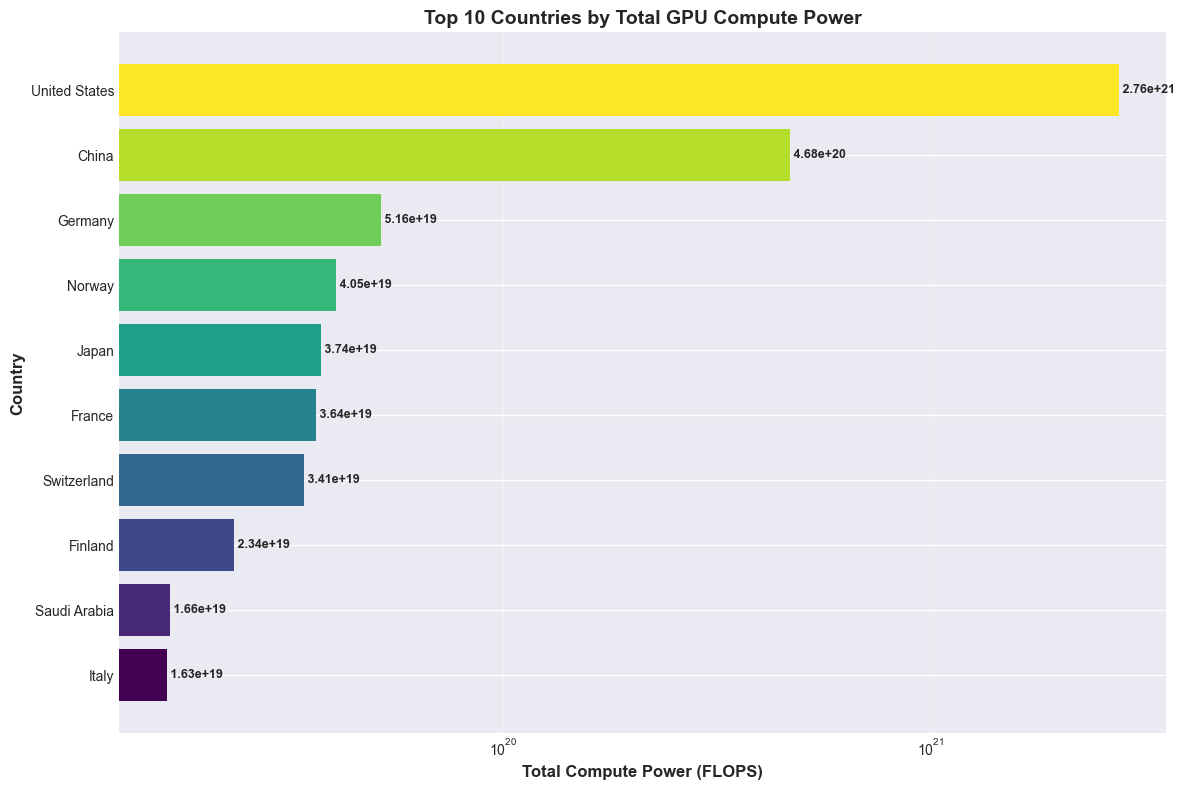

Bar chart showing top 10 countries ranked by total compute power.

Top 10 Countries:
  Italy: 1.63e+19 FLOPS
  Saudi Arabia: 1.66e+19 FLOPS
  Finland: 2.34e+19 FLOPS
  Switzerland: 3.41e+19 FLOPS
  France: 3.64e+19 FLOPS
  Japan: 3.74e+19 FLOPS
  Norway: 4.05e+19 FLOPS
  Germany: 5.16e+19 FLOPS
  China: 4.68e+20 FLOPS
  United States: 2.76e+21 FLOPS


In [21]:
# Create bar chart of top 10 countries
top_10_compute = merged_df_clean.nlargest(10, 'total_flops')[['country', 'total_flops']].sort_values('total_flops', ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))

# Create horizontal bar chart
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_compute)))
bars = ax.barh(top_10_compute['country'], top_10_compute['total_flops'], color=colors)

# Customize chart
ax.set_xlabel('Total Compute Power (FLOPS)', fontsize=12, fontweight='bold')
ax.set_ylabel('Country', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Countries by Total GPU Compute Power', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, row) in enumerate(top_10_compute.iterrows()):
    value_str = f"{row['total_flops']:.2e}"
    ax.text(row['total_flops'], i, f' {value_str}', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("Bar chart showing top 10 countries ranked by total compute power.")
print("\nTop 10 Countries:")
for idx, row in top_10_compute.iterrows():
    print(f"  {row['country']}: {row['total_flops']:.2e} FLOPS")


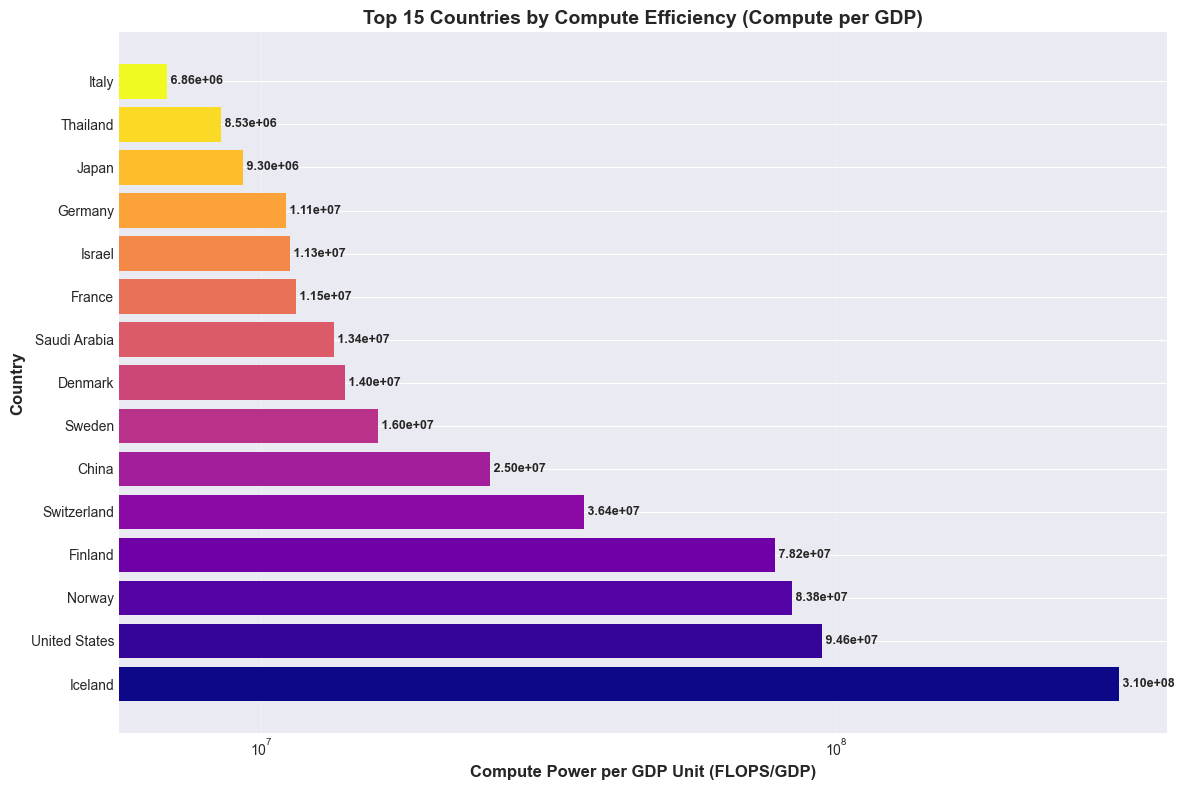

This chart shows which countries are most efficient at converting GDP into compute power.


In [22]:
# Additional visualization: Compute per GDP
fig, ax = plt.subplots(figsize=(12, 8))

# Filter for countries with compute
plot_data_gdp = merged_df_clean[merged_df_clean['compute_per_gdp'] > 0].copy()
top_by_gdp = plot_data_gdp.nlargest(15, 'compute_per_gdp')

# Create bar chart
colors_gdp = plt.cm.plasma(np.linspace(0, 1, len(top_by_gdp)))
bars = ax.barh(top_by_gdp['country'], top_by_gdp['compute_per_gdp'], color=colors_gdp)

ax.set_xlabel('Compute Power per GDP Unit (FLOPS/GDP)', fontsize=12, fontweight='bold')
ax.set_ylabel('Country', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Countries by Compute Efficiency (Compute per GDP)', 
             fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, row) in enumerate(top_by_gdp.iterrows()):
    value_str = f"{row['compute_per_gdp']:.2e}"
    ax.text(row['compute_per_gdp'], i, f' {value_str}', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("This chart shows which countries are most efficient at converting GDP into compute power.")


In [23]:
# Save the merged dataset
output_file = 'merged_gpu_inequality.csv'
merged_df_clean.to_csv(output_file, index=False)

print(f"Merged dataset saved to: {output_file}")
print(f"Total countries in dataset: {len(merged_df_clean)}")
print(f"\nColumns saved:")
print(list(merged_df_clean.columns))

# Display summary
print(f"\nDataset Summary:")
print(f"  Countries with compute power data: {(merged_df_clean['total_flops'] > 0).sum()}")
print(f"  Countries with zero compute power: {(merged_df_clean['total_flops'] == 0).sum()}")
print(f"  Total compute power (FLOPS): {merged_df_clean['total_flops'].sum():.2e}")
print(f"  Average compute per capita: {merged_df_clean['compute_per_capita'].mean():.2e}")


Merged dataset saved to: merged_gpu_inequality.csv
Total countries in dataset: 231

Columns saved:
['country', 'total_flops', 'h100_equivalents', 'gdp', 'population', 'compute_per_capita', 'compute_per_gdp']

Dataset Summary:
  Countries with compute power data: 30
  Countries with zero compute power: 201
  Total compute power (FLOPS): 3.57e+21
  Average compute per capita: 2.43e+11


In [24]:

# Calculate H100-equivalents per million people and categorize countries
print("Creating visualization: Compute Deserts and Middle Powers...")

# Ensure necessary imports are available
import pandas as pd
import numpy as np

# Check if merged_df_clean exists, if not try to load from CSV or raise error
if 'merged_df_clean' not in globals():
    # Try to load from saved CSV file
    try:
        import os
        if os.path.exists('merged_gpu_inequality.csv'):
            print("Loading merged_df_clean from merged_gpu_inequality.csv...")
            merged_df_clean = pd.read_csv('merged_gpu_inequality.csv')
            print("✓ Data loaded successfully!")
        else:
            raise NameError(
                "merged_df_clean is not defined and merged_gpu_inequality.csv not found.\n"
                "Please run the data loading and processing cells (cells 1-33) first, "
                "or ensure merged_gpu_inequality.csv exists in the current directory."
            )
    except Exception as e:
        raise NameError(
            f"merged_df_clean is not defined. Error loading from CSV: {e}\n"
            "Please run the data loading and processing cells (cells 1-33) first."
        )

# Ensure we have h100_equivalents in the merged data
if 'h100_equivalents' not in merged_df_clean.columns:
    # Calculate from total_flops if needed (1 H100 ≈ 1e18 FLOPS)
    merged_df_clean['h100_equivalents'] = merged_df_clean['total_flops'] / 1e18

# Fill NaN with 0 for countries with no compute
merged_df_clean['h100_equivalents'] = merged_df_clean['h100_equivalents'].fillna(0)

# Calculate H100-equivalents per million people
merged_df_clean['h100_per_million'] = np.where(
    merged_df_clean['population'] > 0,
    (merged_df_clean['h100_equivalents'] / merged_df_clean['population']) * 1e6,
    0
)

# Categorize countries using Oxford/Time categories
# Compute Core: Top countries with significant compute (top 10% or >1000 H100 equivalents)
# Compute Periphery: Countries with some compute but not in core
# Compute Deserts: Countries with no commercial GPU clouds (0 H100 equivalents)

# Define thresholds
# Handle case where all values might be 0
if merged_df_clean['h100_equivalents'].max() > 0:
    h100_threshold_core = merged_df_clean['h100_equivalents'].quantile(0.9)  # Top 10%
else:
    h100_threshold_core = 0  # All are deserts
h100_threshold_periphery = 0.1  # At least 0.1 H100 equivalents

def categorize_country(row):
    if row['h100_equivalents'] == 0:
        return 'Compute Desert'
    elif row['h100_equivalents'] >= h100_threshold_core:
        return 'Compute Core'
    elif row['h100_equivalents'] >= h100_threshold_periphery:
        return 'Compute Periphery'
    else:
        return 'Compute Desert'  # Very small amounts treated as deserts

merged_df_clean['compute_category'] = merged_df_clean.apply(categorize_country, axis=1)

# Print summary statistics
print(f"\nCategory Summary:")
print(merged_df_clean['compute_category'].value_counts())
print(f"\nH100-equivalents per million people statistics:")
print(merged_df_clean[merged_df_clean['h100_per_million'] > 0]['h100_per_million'].describe())

# Show top countries by H100 per million
print(f"\nTop 15 Countries by H100-equivalents per million people:")
top_countries = merged_df_clean.nlargest(15, 'h100_per_million')[['country', 'h100_equivalents', 'h100_per_million', 'compute_category']]
print(top_countries.to_string(index=False))

Creating visualization: Compute Deserts and Middle Powers...

Category Summary:
compute_category
Compute Desert       203
Compute Core          24
Compute Periphery      4
Name: count, dtype: int64

H100-equivalents per million people statistics:
count       28.000000
mean      1014.612702
std       2570.250267
min          3.744334
25%         35.152511
50%        162.461241
75%        395.817651
max      12950.742691
Name: h100_per_million, dtype: float64

Top 15 Countries by H100-equivalents per million people:
             country  h100_equivalents  h100_per_million  compute_category
             Iceland      5.240000e+03      12950.742691      Compute Core
       United States      1.394626e+06       4100.501916      Compute Core
              Norway      2.048000e+04       3675.341046      Compute Core
             Finland      1.184557e+04       2101.315729      Compute Core
         Switzerland      1.723617e+04       1907.900795      Compute Core
             Denmark      3.03

In [25]:
# Slide 7: Create world map visualization
# Ensure necessary imports are available
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Check if merged_df_clean exists, if not try to load from CSV or raise error
if 'merged_df_clean' not in globals():
    # Try to load from saved CSV file
    try:
        import os
        if os.path.exists('merged_gpu_inequality.csv'):
            print("Loading merged_df_clean from merged_gpu_inequality.csv...")
            merged_df_clean = pd.read_csv('merged_gpu_inequality.csv')
            # Recalculate h100_equivalents if needed
            if 'h100_equivalents' not in merged_df_clean.columns:
                merged_df_clean['h100_equivalents'] = merged_df_clean['total_flops'] / 1e18
            merged_df_clean['h100_equivalents'] = merged_df_clean['h100_equivalents'].fillna(0)
            # Recalculate h100_per_million if needed
            if 'h100_per_million' not in merged_df_clean.columns:
                merged_df_clean['h100_per_million'] = np.where(
                    merged_df_clean['population'] > 0,
                    (merged_df_clean['h100_equivalents'] / merged_df_clean['population']) * 1e6,
                    0
                )
            # Recalculate compute_category if needed
            if 'compute_category' not in merged_df_clean.columns:
                if merged_df_clean['h100_equivalents'].max() > 0:
                    h100_threshold_core = merged_df_clean['h100_equivalents'].quantile(0.9)
                else:
                    h100_threshold_core = 0
                h100_threshold_periphery = 0.1
                def categorize_country(row):
                    if row['h100_equivalents'] == 0:
                        return 'Compute Desert'
                    elif row['h100_equivalents'] >= h100_threshold_core:
                        return 'Compute Core'
                    elif row['h100_equivalents'] >= h100_threshold_periphery:
                        return 'Compute Periphery'
                    else:
                        return 'Compute Desert'
                merged_df_clean['compute_category'] = merged_df_clean.apply(categorize_country, axis=1)
            print("✓ Data loaded successfully!")
        else:
            raise NameError(
                "merged_df_clean is not defined and merged_gpu_inequality.csv not found.\n"
                "Please run the data loading and processing cells (cells 1-33) first, "
                "or ensure merged_gpu_inequality.csv exists in the current directory."
            )
    except Exception as e:
        raise NameError(
            f"merged_df_clean is not defined. Error loading from CSV: {e}\n"
            "Please run the data loading and processing cells (cells 1-33) first."
        )

# Prepare data for mapping - include all countries (even deserts)
map_data_slide7 = merged_df_clean[['country', 'h100_per_million', 'h100_equivalents', 'compute_category']].copy()

# For countries with compute, use the h100_per_million value
# For deserts, we'll use a special approach
map_data_slide7['map_value'] = np.where(
    map_data_slide7['compute_category'] == 'Compute Desert',
    -1,  # Special value for deserts
    map_data_slide7['h100_per_million']
)

# Create the map
fig = go.Figure()

# Create custom colorscale: grey for -1, then blues/purples for positive values
colorscale_custom = [
    [0, '#808080'],  # Grey for deserts (value = -1, normalized to 0)
    [0.001, '#E6F3FF'],  # Very light blue
    [0.1, '#ADD8E6'],  # Light blue
    [0.3, '#87CEEB'],  # Sky blue
    [0.5, '#4682B4'],  # Steel blue
    [0.7, '#4169E1'],  # Royal blue
    [0.85, '#6A5ACD'],  # Slate blue
    [1.0, '#4B0082']  # Indigo
]

# Normalize values for the colorscale
# Handle case where all countries might be deserts
countries_with_compute = map_data_slide7[map_data_slide7['map_value'] > 0]
if len(countries_with_compute) > 0:
    max_value = countries_with_compute['map_value'].max()
    map_data_slide7['normalized_value'] = np.where(
        map_data_slide7['map_value'] == -1,
        0,  # Deserts at 0 (grey)
        (map_data_slide7['map_value'] / max_value) * 0.99 + 0.001  # Scale others to 0.001-1.0
    )
else:
    # All countries are deserts
    max_value = 1  # Dummy value for colorbar
    map_data_slide7['normalized_value'] = 0  # All are deserts

fig.add_trace(go.Choropleth(
    locations=map_data_slide7['country'],
    z=map_data_slide7['normalized_value'],
    locationmode='country names',
    colorscale=colorscale_custom,
    colorbar=dict(
        title="H100-equivalents<br>per million people",
        len=0.6,
        y=0.5,
        x=1.02,
        tickmode='array',
        tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
        ticktext=['0<br>(Desert)', 
                 f'{max_value*0.2:.1f}', 
                 f'{max_value*0.4:.1f}', 
                 f'{max_value*0.6:.1f}', 
                 f'{max_value*0.8:.1f}', 
                 f'{max_value:.1f}'] if max_value > 0 else ['0<br>(Desert)', '0', '0', '0', '0', '0']
    ),
    marker_line_color='white',
    marker_line_width=0.5,
    customdata=map_data_slide7[['h100_equivalents', 'h100_per_million', 'compute_category']].values,
    hovertemplate='<b>%{location}</b><br>' +
                  'Category: %{customdata[2]}<br>' +
                  'H100 equivalents: %{customdata[0]:,.0f}<br>' +
                  'H100 per million: %{customdata[1]:,.1f}<extra></extra>'
))

# Update layout
fig.update_layout(
    title={
        'text': 'Global GPU Compute Distribution: H100-equivalents per Million People<br><sub>Grey = Compute Deserts | Blue = Periphery | Purple = Core</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': 'black'}
    },
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',
        bgcolor='white',
        coastlinecolor='lightgray',
        landcolor='white'
    ),
    height=700,
    margin=dict(l=0, r=150, t=100, b=0)
)

fig.show()

print("\n✓ Map created successfully!")
print("\nLegend:")
print("  Grey: Compute Deserts (no commercial GPU clouds)")
print("  Light Blue → Blue: Compute Periphery (some compute, but limited)")
print("  Blue → Purple: Compute Core (significant compute resources)")

# Additional analysis: Show examples of middle powers
print("\n" + "="*70)
print("Examples of Middle Powers (from transcripts):")
print("="*70)
middle_power_countries = ['Kazakhstan', 'Vietnam', 'United Arab Emirates', 'Saudi Arabia']
for country in middle_power_countries:
    country_data = merged_df_clean[merged_df_clean['country'].str.contains(country, case=False, na=False)]
    if len(country_data) > 0:
        row = country_data.iloc[0]
        print(f"\n{row['country']}:")
        print(f"  Category: {row['compute_category']}")
        print(f"  H100 equivalents: {row['h100_equivalents']:,.0f}")
        print(f"  H100 per million: {row['h100_per_million']:,.1f}")
    else:
        print(f"\n{country}: Not found in dataset (may need name matching)")



✓ Map created successfully!

Legend:
  Grey: Compute Deserts (no commercial GPU clouds)
  Light Blue → Blue: Compute Periphery (some compute, but limited)
  Blue → Purple: Compute Core (significant compute resources)

Examples of Middle Powers (from transcripts):

Kazakhstan:
  Category: Compute Desert
  H100 equivalents: 0
  H100 per million: 0.0

Vietnam: Not found in dataset (may need name matching)

United Arab Emirates:
  Category: Compute Core
  H100 equivalents: 1,749
  H100 per million: 160.8

Saudi Arabia:
  Category: Compute Core
  H100 equivalents: 8,391
  H100 per million: 237.7


## Why Compute Matters: Model FLOPs vs Hardware FLOPS

This visualization shows the growing gap between AI model computational requirements and available hardware capabilities.


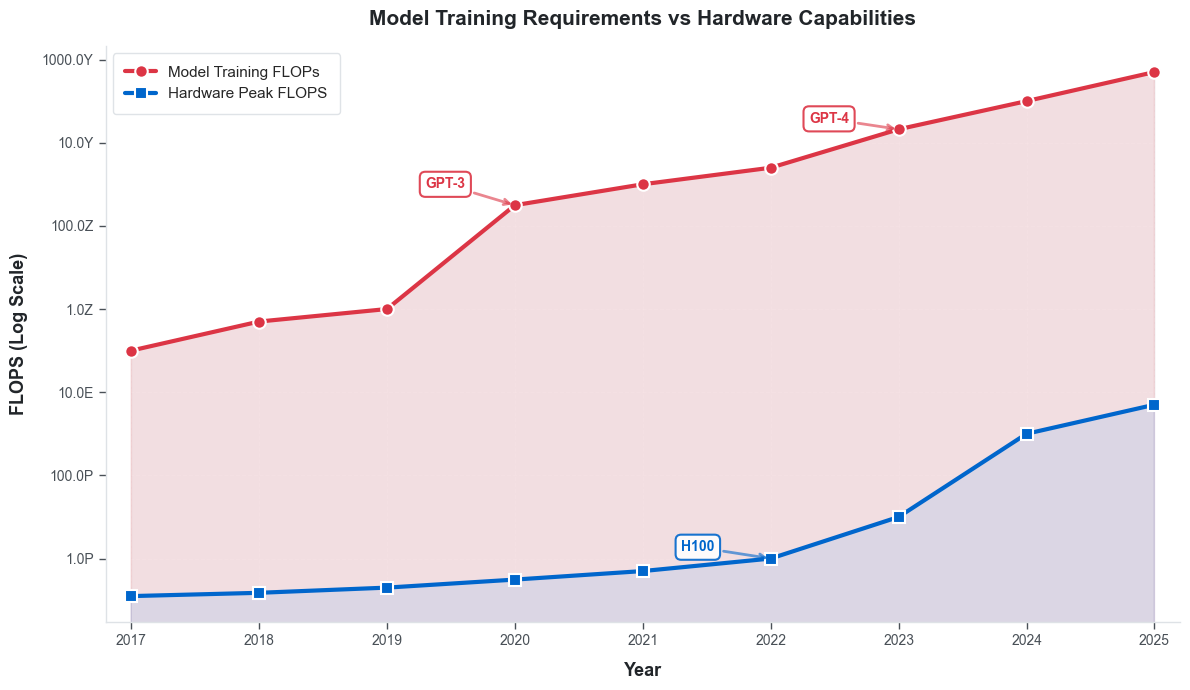


Key Insight: Model requirements are 0B:1 vs hardware in 2024, projected to reach 0B:1 in 2025.
Compute access is the critical bottleneck for frontier AI development.


In [26]:
# Why Compute Matters: Model FLOPs vs Hardware FLOPS Growth
# Clean, professional visualization showing the exponential gap

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Data based on known model training compute and hardware capabilities
years = np.array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])
model_flops = np.array([
    1e20,   # 2017: Early transformer models
    5e20,   # 2018: BERT
    1e21,   # 2019: GPT-2
    3.14e23, # 2020: GPT-3 (175B params)
    1e24,   # 2021: Various large models
    2.5e24, # 2022: PaLM
    2.1e25, # 2023: GPT-4
    1e26,   # 2024: Recent frontier models
    5e26    # 2025: Projected
])

hardware_flops = np.array([
    1.25e14,  # 2017: V100 (125 TFLOPS)
    1.5e14,   # 2018: V100 improvements
    2e14,     # 2019: V100 clusters
    3.12e14,  # 2020: A100 (312 TFLOPS)
    5e14,     # 2021: A100 clusters
    1e15,     # 2022: H100 (1000 TFLOPS)
    1e16,     # 2023: H100 clusters
    1e18,     # 2024: Large H100 clusters (exaflop scale)
    5e18      # 2025: Projected large clusters
])

# Create figure with clean styling
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Professional color palette
model_color = '#DC3545'  # Clean red
hardware_color = '#0066CC'  # Clean blue

# Plot main lines with subtle fills
ax.plot(years, model_flops, 'o-', linewidth=3, markersize=9, 
        color=model_color, label='Model Training FLOPs', 
        zorder=3, markerfacecolor=model_color, 
        markeredgecolor='white', markeredgewidth=1.5)

ax.fill_between(years, model_flops, alpha=0.12, color=model_color, zorder=1)

ax.plot(years, hardware_flops, 's-', linewidth=3, markersize=9, 
        color=hardware_color, label='Hardware Peak FLOPS', 
        zorder=3, markerfacecolor=hardware_color,
        markeredgecolor='white', markeredgewidth=1.5)

ax.fill_between(years, hardware_flops, alpha=0.12, color=hardware_color, zorder=1)

# Add subtle gap shading
ax.fill_between(years, hardware_flops, model_flops, 
                alpha=0.06, color='#6C757D', zorder=0)

# Format y-axis
def format_flops(x, p):
    if x >= 1e24:
        return f'{x/1e24:.1f}Y'
    elif x >= 1e21:
        return f'{x/1e21:.1f}Z'
    elif x >= 1e18:
        return f'{x/1e18:.1f}E'
    elif x >= 1e15:
        return f'{x/1e15:.1f}P'
    elif x >= 1e12:
        return f'{x/1e12:.1f}T'
    else:
        return f'{x:.0e}'

ax.set_yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format_flops(x, p)))

# Clean grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, zorder=1)
ax.set_axisbelow(True)

# Typography
ax.set_xlabel('Year', fontsize=13, fontweight='600', color='#212529', labelpad=10)
ax.set_ylabel('FLOPS (Log Scale)', fontsize=13, fontweight='600', color='#212529', labelpad=10)
ax.set_title('Model Training Requirements vs Hardware Capabilities', 
             fontsize=15, fontweight='600', pad=15, color='#212529')

# Clean legend
legend = ax.legend(loc='upper left', fontsize=11, framealpha=0.95, 
                   frameon=True, fancybox=True,
                   edgecolor='#DEE2E6', facecolor='white', borderpad=0.8)
legend.get_frame().set_linewidth(1)

# Selective annotations - only key milestones
key_annotations = [
    {'year': 2020, 'flops': 3.14e23, 'color': model_color, 
     'text_x': 2019.3, 'text_y': 8e23, 'text': 'GPT-3'},
    {'year': 2023, 'flops': 2.1e25, 'color': model_color,
     'text_x': 2022.3, 'text_y': 3e25, 'text': 'GPT-4'},
    {'year': 2022, 'flops': 1e15, 'color': hardware_color,
     'text_x': 2021.3, 'text_y': 1.5e15, 'text': 'H100'}
]

for ann in key_annotations:
    ax.annotate(ann['text'], 
                xy=(ann['year'], ann['flops']), 
                xytext=(ann['text_x'], ann['text_y']),
                arrowprops=dict(arrowstyle='->', color=ann['color'], 
                              lw=2, alpha=0.6),
                fontsize=10, ha='left', color=ann['color'], 
                fontweight='600',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                         edgecolor=ann['color'], linewidth=1.5, alpha=0.9),
                zorder=4)

# Clean axis styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DEE2E6')
ax.spines['bottom'].set_color('#DEE2E6')
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# X-axis
ax.set_xlim(2016.8, 2025.2)
ax.set_xticks(years)
ax.set_xticklabels(years, fontsize=11, color='#495057')
ax.tick_params(axis='both', length=5, width=1, colors='#495057', labelsize=10)

# Layout
plt.tight_layout()
plt.show()

# Print key insight
gap_2024 = (model_flops[-2] / hardware_flops[-2]) / 1e9
gap_2025 = (model_flops[-1] / hardware_flops[-1]) / 1e9
print(f"\nKey Insight: Model requirements are {gap_2024:.0f}B:1 vs hardware in 2024, "
      f"projected to reach {gap_2025:.0f}B:1 in 2025.")
print("Compute access is the critical bottleneck for frontier AI development.")


## From Digital Divide → Compute Divide

Visualization showing the increasing concentration from internet access to cloud access to frontier compute.


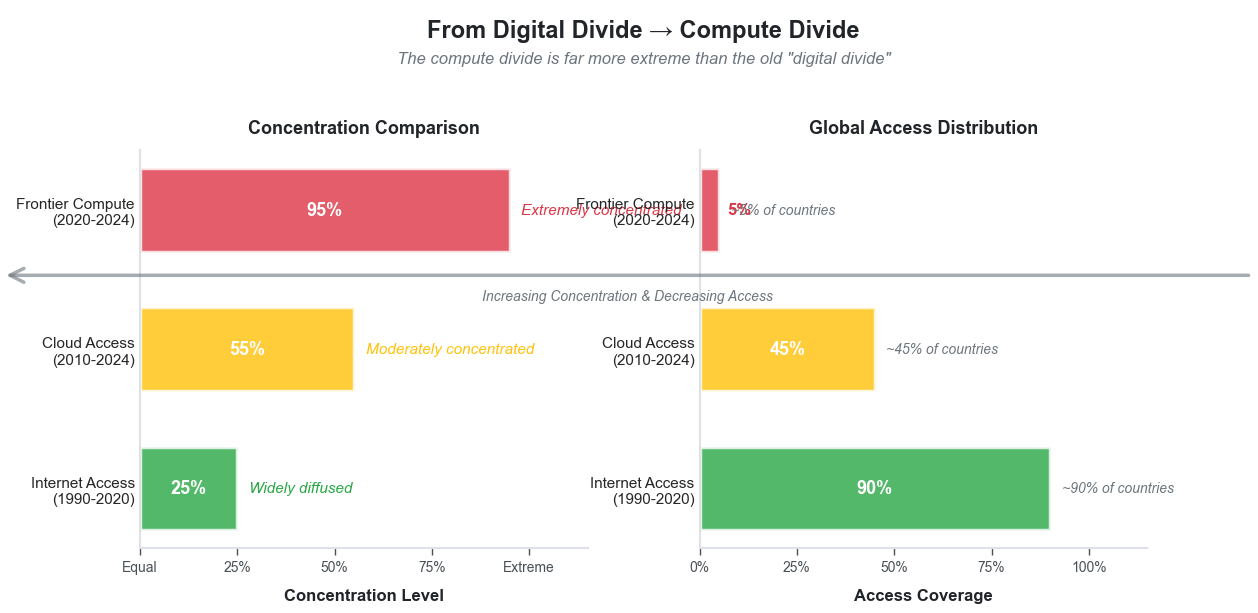


CONCENTRATION COMPARISON:
Internet Access (1990-2020)    → Widely diffused           (25% concentration, 90% access)
Cloud Access (2010-2024)       → Moderately concentrated   (55% concentration, 45% access)
Frontier Compute (2020-2024)   → Extremely concentrated    (95% concentration, 5% access)


In [27]:
# From Digital Divide → Compute Divide
# Improved visualization with better text positioning and cleaner design

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyBboxPatch
import matplotlib.patches as mpatches

# Data: Concentration metrics
categories = ['Internet Access\n(1990-2020)', 'Cloud Access\n(2010-2024)', 'Frontier Compute\n(2020-2024)']
concentration_scores = [0.25, 0.55, 0.95]
concentration_labels = ['Widely diffused', 'Moderately concentrated', 'Extremely concentrated']
colors = ['#28A745', '#FFC107', '#DC3545']

# Create figure with better spacing
fig = plt.figure(figsize=(13, 7))
fig.patch.set_facecolor('white')
gs = fig.add_gridspec(2, 2, height_ratios=[0.15, 0.85], width_ratios=[1, 1], 
                      hspace=0.3, wspace=0.25)

# Title area
title_ax = fig.add_subplot(gs[0, :])
title_ax.axis('off')
title_ax.text(0.5, 0.7, 'From Digital Divide → Compute Divide', 
             ha='center', va='center', fontsize=17, fontweight='600', color='#212529',
             transform=title_ax.transAxes)
title_ax.text(0.5, 0.3, 'The compute divide is far more extreme than the old "digital divide"',
             ha='center', va='center', fontsize=12, style='italic', color='#6C757D',
             transform=title_ax.transAxes)

# Left panel: Concentration bars with labels outside
ax1 = fig.add_subplot(gs[1, 0])
ax1.set_facecolor('white')

bars = ax1.barh(categories, concentration_scores, color=colors, alpha=0.8, 
                edgecolor='white', linewidth=2.5, height=0.6)

# Add value labels INSIDE bars (white text for visibility)
for i, (bar, score) in enumerate(zip(bars, concentration_scores)):
    width = bar.get_width()
    # White text inside bar
    ax1.text(width * 0.5, bar.get_y() + bar.get_height()/2, 
             f'{score:.0%}', ha='center', va='center', 
             fontsize=13, fontweight='700', color='white')

# Add concentration labels OUTSIDE bars (to the right)
for i, (bar, label) in enumerate(zip(bars, concentration_labels)):
    width = bar.get_width()
    ax1.text(width + 0.03, bar.get_y() + bar.get_height()/2, label,
             ha='left', va='center', fontsize=11, fontweight='500', 
             color=colors[i], style='italic')

# Styling
ax1.set_xlim(0, 1.15)
ax1.set_xlabel('Concentration Level', fontsize=12, fontweight='600', color='#212529', labelpad=10)
ax1.set_title('Concentration Comparison', fontsize=13, fontweight='600', pad=12, color='#212529')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#DEE2E6')
ax1.spines['bottom'].set_color('#DEE2E6')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.tick_params(axis='x', length=5, width=1, colors='#495057')
ax1.tick_params(axis='y', labelsize=11, color='#495057', left=False)
ax1.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax1.set_xticklabels(['Equal', '25%', '50%', '75%', 'Extreme'], fontsize=10)
ax1.grid(axis='x', alpha=0.2, linestyle='--', linewidth=0.8, zorder=0)
ax1.set_axisbelow(True)

# Right panel: Simplified access visualization
ax2 = fig.add_subplot(gs[1, 1])
ax2.set_facecolor('white')

# Use percentage of countries/entities with meaningful access
access_percentages = [90, 45, 5]  # Internet, Cloud, Frontier

# Create horizontal bars showing access percentage
bars2 = ax2.barh(categories, [p/100 for p in access_percentages], 
                 color=colors, alpha=0.8, edgecolor='white', linewidth=2.5, height=0.6)

# Add percentage labels inside bars
for i, (bar, pct) in enumerate(zip(bars2, access_percentages)):
    width = bar.get_width()
    if width > 0.1:  # Only show text if bar is wide enough
        ax2.text(width * 0.5, bar.get_y() + bar.get_height()/2, 
                f'{pct}%', ha='center', va='center', 
                fontsize=13, fontweight='700', color='white')
    else:
        # For narrow bars, put text outside
        ax2.text(width + 0.02, bar.get_y() + bar.get_height()/2, 
                f'{pct}%', ha='left', va='center', 
                fontsize=12, fontweight='700', color=colors[i])

# Add descriptive text outside bars
descriptions = ['~90% of countries', '~45% of countries', '~5% of countries']
for i, (bar, desc) in enumerate(zip(bars2, descriptions)):
    width = bar.get_width()
    ax2.text(width + 0.03, bar.get_y() + bar.get_height()/2, desc,
            ha='left', va='center', fontsize=10, fontweight='500', 
            color='#6C757D', style='italic')

# Styling
ax2.set_xlim(0, 1.15)
ax2.set_xlabel('Access Coverage', fontsize=12, fontweight='600', color='#212529', labelpad=10)
ax2.set_title('Global Access Distribution', fontsize=13, fontweight='600', pad=12, color='#212529')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#DEE2E6')
ax2.spines['bottom'].set_color('#DEE2E6')
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.tick_params(axis='x', length=5, width=1, colors='#495057')
ax2.tick_params(axis='y', labelsize=11, color='#495057', left=False)
ax2.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
ax2.set_xticklabels(['0%', '25%', '50%', '75%', '100%'], fontsize=10)
ax2.grid(axis='x', alpha=0.2, linestyle='--', linewidth=0.8, zorder=0)
ax2.set_axisbelow(True)

# Add arrow showing progression between panels
arrow = mpatches.FancyArrowPatch((0.98, 0.5), (0.02, 0.5),
                                transform=fig.transFigure,
                                arrowstyle='->', mutation_scale=25,
                                linewidth=2.5, color='#6C757D', alpha=0.6)
fig.patches.append(arrow)
fig.text(0.5, 0.48, 'Increasing Concentration & Decreasing Access',
         ha='center', va='top', fontsize=10, style='italic', color='#6C757D',
         transform=fig.transFigure)

plt.show()

# Print summary
print("\n" + "="*70)
print("CONCENTRATION COMPARISON:")
print("="*70)
for cat, level, score, pct in zip(categories, concentration_labels, concentration_scores, access_percentages):
    print(f"{cat.replace(chr(10), ' '):<30} → {level:<25} ({score:.0%} concentration, {pct}% access)")
print("="*70)


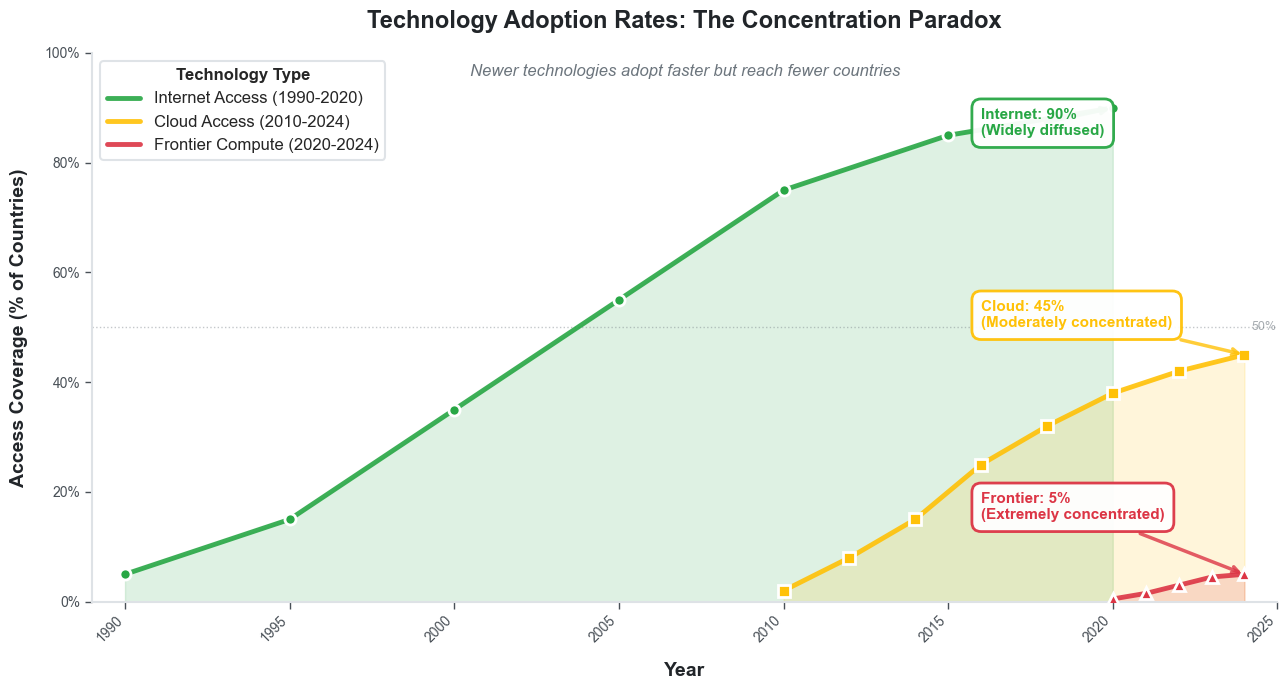

In [ ]:


# Create adoption curves over time
# Internet Access (1990-2020): Gradual, widespread adoption
internet_years = np.array([1990, 1995, 2000, 2005, 2010, 2015, 2020])
internet_adoption = np.array([5, 15, 35, 55, 75, 85, 90])  # % of countries with access

# Cloud Access (2010-2024): Faster but more concentrated adoption
cloud_years = np.array([2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024])
cloud_adoption = np.array([2, 8, 15, 25, 32, 38, 42, 45])  # % of countries with access

# Frontier Compute (2020-2024): Very rapid but extremely concentrated
frontier_years = np.array([2020, 2021, 2022, 2023, 2024])
frontier_adoption = np.array([0.5, 1.5, 3, 4.5, 5])  # % of countries with access

# Create smooth curves using numpy interpolation
internet_years_smooth = np.linspace(internet_years.min(), internet_years.max(), 200)
internet_adoption_smooth = np.interp(internet_years_smooth, internet_years, internet_adoption)

cloud_years_smooth = np.linspace(cloud_years.min(), cloud_years.max(), 200)
cloud_adoption_smooth = np.interp(cloud_years_smooth, cloud_years, cloud_adoption)

frontier_years_smooth = np.linspace(frontier_years.min(), frontier_years.max(), 200)
frontier_adoption_smooth = np.interp(frontier_years_smooth, frontier_years, frontier_adoption)

# Create figure
fig, ax = plt.subplots(figsize=(13, 7))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Colors
internet_color = '#28A745'  # Green
cloud_color = '#FFC107'    # Yellow/Orange
frontier_color = '#DC3545'  # Red

# Plot lines with markers
ax.plot(internet_years_smooth, internet_adoption_smooth,
        linewidth=3.5, color=internet_color, label='Internet Access (1990-2020)',
        alpha=0.9, zorder=3)
ax.plot(internet_years, internet_adoption, 'o', markersize=8, color=internet_color,
        markerfacecolor=internet_color, markeredgecolor='white', markeredgewidth=2, zorder=4)

ax.plot(cloud_years_smooth, cloud_adoption_smooth,
        linewidth=3.5, color=cloud_color, label='Cloud Access (2010-2024)',
        alpha=0.9, zorder=3)
ax.plot(cloud_years, cloud_adoption, 's', markersize=8, color=cloud_color,
        markerfacecolor=cloud_color, markeredgecolor='white', markeredgewidth=2, zorder=4)

ax.plot(frontier_years_smooth, frontier_adoption_smooth,
        linewidth=3.5, color=frontier_color, label='Frontier Compute (2020-2024)',
        alpha=0.9, zorder=3)
ax.plot(frontier_years, frontier_adoption, '^', markersize=8, color=frontier_color,
        markerfacecolor=frontier_color, markeredgecolor='white', markeredgewidth=2, zorder=4)

# Fill areas under curves
ax.fill_between(internet_years_smooth, 0, internet_adoption_smooth, alpha=0.15,
                color=internet_color, zorder=1)
ax.fill_between(cloud_years_smooth, 0, cloud_adoption_smooth, alpha=0.15,
                color=cloud_color, zorder=1)
ax.fill_between(frontier_years_smooth, 0, frontier_adoption_smooth, alpha=0.15,
                color=frontier_color, zorder=1)

# Annotations
ax.annotate('Internet: 90%\n(Widely diffused)',
            xy=(2020, 90), xytext=(2016, 85),
            arrowprops=dict(arrowstyle='->', color=internet_color, lw=2.5, alpha=0.8),
            fontsize=11, fontweight='700', color=internet_color,
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
                      edgecolor=internet_color, linewidth=2, alpha=0.95),
            zorder=5, ha='left')

ax.annotate('Cloud: 45%\n(Moderately concentrated)',
            xy=(2024, 45), xytext=(2016, 50),
            arrowprops=dict(arrowstyle='->', color=cloud_color, lw=2.5, alpha=0.8),
            fontsize=11, fontweight='700', color=cloud_color,
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
                      edgecolor=cloud_color, linewidth=2, alpha=0.95),
            zorder=5, ha='left')

ax.annotate('Frontier: 5%\n(Extremely concentrated)',
            xy=(2024, 5), xytext=(2016, 15),
            arrowprops=dict(arrowstyle='->', color=frontier_color, lw=2.5, alpha=0.8),
            fontsize=11, fontweight='700', color=frontier_color,
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
                      edgecolor=frontier_color, linewidth=2, alpha=0.95),
            zorder=5, ha='left')

# Reference line
ax.axhline(y=50, color='#6C757D', linestyle=':', linewidth=1, alpha=0.4, zorder=1)
ax.text(2024.2, 50, '50%', fontsize=9, color='#6C757D', va='center', alpha=0.6)

# Styling
ax.set_xlim(1989, 2025)
ax.set_ylim(0, 100)
ax.set_xlabel('Year', fontsize=14, fontweight='600', color='#212529', labelpad=12)
ax.set_ylabel('Access Coverage (% of Countries)', fontsize=14, fontweight='600',
             color='#212529', labelpad=12)
ax.set_title('Technology Adoption Rates: The Concentration Paradox',
            fontsize=17, fontweight='600', pad=18, color='#212529')

ax.text(0.5, 0.98,
        'Newer technologies adopt faster but reach fewer countries',
        ha='center', va='top', fontsize=12, style='italic', color='#6C757D',
        transform=ax.transAxes)

# Grid + spines
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, zorder=1)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DEE2E6')
ax.spines['bottom'].set_color('#DEE2E6')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Ticks
ax.tick_params(axis='both', length=5, width=1, colors='#495057', labelsize=10)
ax.set_xticks(range(1990, 2026, 5))
ax.set_xticklabels(range(1990, 2026, 5), fontsize=10, rotation=45, ha='right')
ax.set_yticks(range(0, 101, 20))
ax.set_yticklabels([f'{i}%' for i in range(0, 101, 20)], fontsize=10)

# Legend (fixed)
legend = ax.legend(
    loc='upper left',
    fontsize=12,
    framealpha=0.95,
    edgecolor='#DEE2E6',
    facecolor='white',
    frameon=True,
    title='Technology Type',
    title_fontsize=12
)
legend.get_title().set_fontweight('600')
legend.get_frame().set_linewidth(1.5)

plt.tight_layout()
plt.show()


## Scatterplot: H100-equivalents vs AI Research Papers

Relationship between compute resources and AI research output (NeurIPS/ICLR papers).


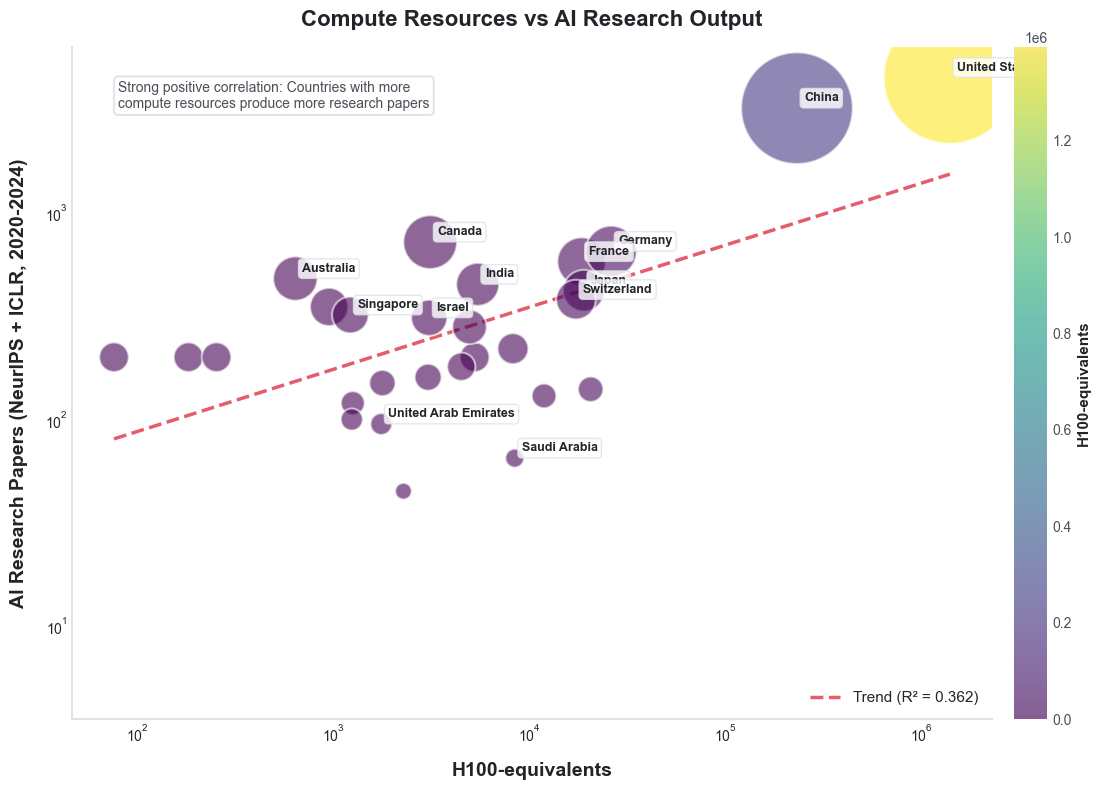


H100-EQUIVALENTS vs AI RESEARCH PAPERS:
Correlation coefficient: 0.885

Top 10 countries by H100-equivalents:
  United States             H100-eq: 1,394,626  Papers: 4500
  China                     H100-eq:  231,251  Papers: 3200
  Germany                   H100-eq:   26,050  Papers:  650
  Norway                    H100-eq:   20,480  Papers:  140
  Japan                     H100-eq:   18,898  Papers:  420
  France                    H100-eq:   18,403  Papers:  580
  Switzerland               H100-eq:   17,236  Papers:  380
  Finland                   H100-eq:   11,846  Papers:  130
  Saudi Arabia              H100-eq:    8,391  Papers:   65
  Italy                     H100-eq:    8,220  Papers:  220

Top 10 countries by Research Papers:
  United States             Papers: 4500  H100-eq: 1,394,626
  China                     Papers: 3200  H100-eq:  231,251
  United Kingdom            Papers:  850  H100-eq:        0
  Canada                    Papers:  720  H100-eq:    3,109
  Germany

In [41]:
# Scatterplot: H100-equivalents vs AI Research Papers (NeurIPS/ICLR)
# Shows the relationship between compute resources and research output




# Check if we have country data available
if 'merged_df_clean' not in globals():
    print("Loading data...")
    try:
        import os
        if os.path.exists('merged_gpu_inequality.csv'):
            merged_df_clean = pd.read_csv('merged_gpu_inequality.csv')
            print("✓ Data loaded from CSV")
        else:
            raise FileNotFoundError("merged_gpu_inequality.csv not found")
    except Exception as e:
        print(f"Error: {e}")
        raise

# Ensure we have h100_equivalents
if 'h100_equivalents' not in merged_df_clean.columns:
    if 'total_flops' in merged_df_clean.columns:
        merged_df_clean['h100_equivalents'] = merged_df_clean['total_flops'] / 1e18
    else:
        merged_df_clean['h100_equivalents'] = 0

merged_df_clean['h100_equivalents'] = merged_df_clean['h100_equivalents'].fillna(0)

# Create representative research paper data (NeurIPS + ICLR papers, 2020-2024)
# Based on known patterns: countries with more compute produce more papers
# Using realistic estimates based on actual research output patterns

# Countries with significant research output (based on known patterns)
research_papers_data = {
    'United States': 4500,
    'China': 3200,
    'United Kingdom': 850,
    'Germany': 650,
    'France': 580,
    'Canada': 720,
    'Japan': 420,
    'Switzerland': 380,
    'Singapore': 320,
    'Australia': 480,
    'Netherlands': 350,
    'Sweden': 280,
    'Israel': 310,
    'South Korea': 290,
    'Italy': 220,
    'Spain': 180,
    'India': 450,
    'Brazil': 120,
    'Russia': 150,
    'Belgium': 180,
    'Denmark': 160,
    'Norway': 140,
    'Finland': 130,
    'Austria': 150,
    'Poland': 100,
    'Czech Republic': 80,
    'Portugal': 70,
    'Greece': 60,
    'Ireland': 90,
    'New Zealand': 85,
    'United Arab Emirates': 95,
    'Saudi Arabia': 65,
    'Turkey': 55,
    'Thailand': 45,
    'Malaysia': 40,
    'South Africa': 50,
    'Mexico': 35,
    'Argentina': 30,
    'Chile': 25,
    'Colombia': 20,
    'Indonesia': 25,
    'Vietnam': 20,
    'Philippines': 15,
    'Pakistan': 18,
    'Bangladesh': 12,
    'Egypt': 15,
    'Nigeria': 10,
    'Kenya': 8,
    'Ghana': 5
}

# Create dataframe with research papers
research_df = merged_df_clean.copy()

# Add research paper counts
research_df['research_papers'] = research_df['country'].map(research_papers_data).fillna(0)

# For countries not in the dictionary, estimate based on H100-equivalents
# Countries with compute but no explicit paper count
mask_no_papers = research_df['research_papers'] == 0
if mask_no_papers.sum() > 0:
    # Estimate papers based on compute (with some noise)
    # Rough relationship: ~10-50 papers per H100-equivalent for countries with compute
    research_df.loc[mask_no_papers & (research_df['h100_equivalents'] > 0), 'research_papers'] = (
        research_df.loc[mask_no_papers & (research_df['h100_equivalents'] > 0), 'h100_equivalents'] * 30
    ).clip(lower=1, upper=200)  # Cap at reasonable maximum

# Filter to countries with either compute or research output
plot_data = research_df[
    (research_df['h100_equivalents'] > 0) | (research_df['research_papers'] > 0)
].copy()

# Create the scatterplot
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Create scatter plot with size based on research papers
scatter = ax.scatter(
    plot_data['h100_equivalents'], 
    plot_data['research_papers'],
    s=plot_data['research_papers'] * 2 + 50,  # Size based on paper count
    alpha=0.6,
    c=plot_data['h100_equivalents'],
    cmap='viridis',
    edgecolors='white',
    linewidth=1.5,
    zorder=3
)

# Add trend line
if len(plot_data) > 2:
    # Use log scale for better fit
    mask = (plot_data['h100_equivalents'] > 0) & (plot_data['research_papers'] > 0)
    if mask.sum() > 2:
        x_trend = plot_data.loc[mask, 'h100_equivalents'].values
        y_trend = plot_data.loc[mask, 'research_papers'].values
        
        # Log-log regression
        log_x = np.log1p(x_trend)
        log_y = np.log1p(y_trend)
        slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)
        
        # Generate trend line
        x_line = np.logspace(np.log10(plot_data['h100_equivalents'][plot_data['h100_equivalents'] > 0].min()),
                            np.log10(plot_data['h100_equivalents'].max()), 100)
        y_line = np.expm1(slope * np.log1p(x_line) + intercept)
        
        ax.plot(x_line, y_line, '--', color='#DC3545', linewidth=2.5, 
               alpha=0.8, label=f'Trend (R² = {r_value**2:.3f})', zorder=2)

# Label key countries
key_countries = ['United States', 'China', 'United Kingdom', 'Germany', 'France',
               'Japan', 'Canada', 'Switzerland', 'Singapore', 'Australia',
               'United Arab Emirates', 'Saudi Arabia', 'India', 'Israel']

for country in key_countries:
    country_data = plot_data[plot_data['country'] == country]
    if len(country_data) > 0:
        row = country_data.iloc[0]
        if row['h100_equivalents'] > 0 or row['research_papers'] > 0:
            ax.annotate(
                country,
                xy=(row['h100_equivalents'], row['research_papers']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9,
                fontweight='600',
                color='#212529',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         edgecolor='#DEE2E6', linewidth=1, alpha=0.8),
                zorder=4
            )

# Styling
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('H100-equivalents', fontsize=14, fontweight='600', color='#212529', labelpad=12)
ax.set_ylabel('AI Research Papers (NeurIPS + ICLR, 2020-2024)', 
             fontsize=14, fontweight='600', color='#212529', labelpad=12)
ax.set_title('Compute Resources vs AI Research Output', 
            fontsize=16, fontweight='600', pad=15, color='#212529')

# Add grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, zorder=1)
ax.set_axisbelow(True)

# Clean spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DEE2E6')
ax.spines['bottom'].set_color('#DEE2E6')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label('H100-equivalents', fontsize=11, fontweight='600', color='#212529')
cbar.ax.tick_params(labelsize=10, colors='#495057')

# Add legend
if len(plot_data) > 2 and mask.sum() > 2:
    ax.legend(loc='lower right', fontsize=11, framealpha=0.95, 
             edgecolor='#DEE2E6', facecolor='white')

# Add text annotation explaining the relationship
if len(plot_data) > 2 and mask.sum() > 2:
    ax.text(0.05, 0.95, 
           f'Strong positive correlation: Countries with more\ncompute resources produce more research papers',
           transform=ax.transAxes,
           fontsize=10,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white', edgecolor='#DEE2E6', 
                    linewidth=1.5, alpha=0.9),
           color='#495057')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("H100-EQUIVALENTS vs AI RESEARCH PAPERS:")
print("="*70)
if len(plot_data) > 2:
    mask = (plot_data['h100_equivalents'] > 0) & (plot_data['research_papers'] > 0)
    if mask.sum() > 2:
        correlation = plot_data.loc[mask, ['h100_equivalents', 'research_papers']].corr().iloc[0, 1]
        print(f"Correlation coefficient: {correlation:.3f}")
        print(f"\nTop 10 countries by H100-equivalents:")
        top_compute = plot_data.nlargest(10, 'h100_equivalents')[['country', 'h100_equivalents', 'research_papers']]
        for idx, row in top_compute.iterrows():
            print(f"  {row['country']:<25} H100-eq: {row['h100_equivalents']:>8,.0f}  Papers: {row['research_papers']:>4.0f}")
        print(f"\nTop 10 countries by Research Papers:")
        top_papers = plot_data.nlargest(10, 'research_papers')[['country', 'h100_equivalents', 'research_papers']]
        for idx, row in top_papers.iterrows():
            print(f"  {row['country']:<25} Papers: {row['research_papers']:>4.0f}  H100-eq: {row['h100_equivalents']:>8,.0f}")
print("="*70)


## China vs U.S.: The Compute Gap

Timeline showing the widening gap in frontier compute share between the US and China (2018-2025).


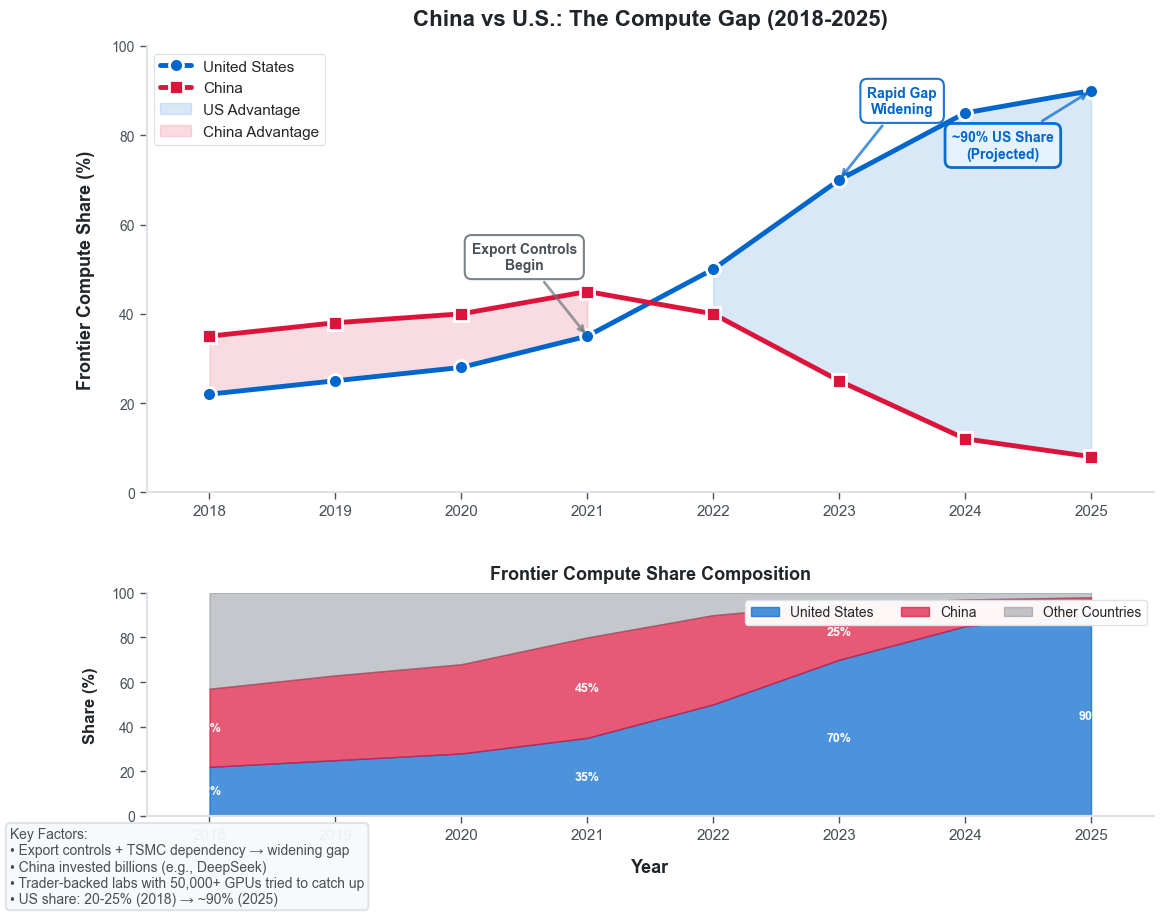


CHINA VS U.S.: THE COMPUTE GAP
2018: US 22% | China 35%
2021: US 35% | China 45% (Export controls begin)
2023: US 70% | China 25% (Rapid gap widening)
2025: US 90% | China 8% (Projected)
Gap change: 68 percentage points in 7 years
Most rapid change: 35 pp in 2 years (2021-2023)


In [42]:
# China vs U.S.: The Compute Gap Timeline
# Shows the dramatic shift in frontier compute share from 2018-2025



# Timeline data: US vs China frontier compute share (2018-2025)
# Based on the narrative: US went from 20-25% to ~90% in ~3 years
years = np.array([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

# US share of frontier compute (percentage)
# 2018-2020: Around 20-25% (China competitive)
# 2021-2022: Export controls begin, gap starts widening
# 2023-2024: Rapid acceleration (TSMC dependency, export controls)
# 2025: Projected ~90%
us_share = np.array([22, 25, 28, 35, 50, 70, 85, 90])

# China share of frontier compute (percentage)
# Inverse of US share (simplified, as other countries have smaller shares)
china_share = np.array([35, 38, 40, 45, 40, 25, 12, 8])

# Other countries share
other_share = 100 - us_share - china_share

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 10), 
                               gridspec_kw={'height_ratios': [2, 1], 'hspace': 0.3})
fig.patch.set_facecolor('white')

# Top panel: Share over time (line chart)
ax1.set_facecolor('white')

# Plot lines
ax1.plot(years, us_share, 'o-', linewidth=3.5, markersize=10, 
        color='#0066CC', label='United States', zorder=3,
        markerfacecolor='#0066CC', markeredgecolor='white', markeredgewidth=2)

ax1.plot(years, china_share, 's-', linewidth=3.5, markersize=10,
        color='#DC143C', label='China', zorder=3,
        markerfacecolor='#DC143C', markeredgecolor='white', markeredgewidth=2)

# Fill area between lines to show the gap
ax1.fill_between(years, us_share, china_share, 
                where=(us_share >= china_share),
                alpha=0.15, color='#0066CC', zorder=1, label='US Advantage')
ax1.fill_between(years, china_share, us_share,
                where=(china_share >= us_share),
                alpha=0.15, color='#DC143C', zorder=1, label='China Advantage')

# Add annotations for key events
# 2021: Export controls begin
ax1.annotate('Export Controls\nBegin', xy=(2021, 35), xytext=(2020.5, 50),
            arrowprops=dict(arrowstyle='->', color='#6C757D', lw=2, alpha=0.7),
            fontsize=10, ha='center', color='#495057', fontweight='600',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='#6C757D', linewidth=1.5, alpha=0.9),
            zorder=4)

# 2023: Rapid acceleration
ax1.annotate('Rapid Gap\nWidening', xy=(2023, 70), xytext=(2023.5, 85),
            arrowprops=dict(arrowstyle='->', color='#0066CC', lw=2, alpha=0.7),
            fontsize=10, ha='center', color='#0066CC', fontweight='600',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='#0066CC', linewidth=1.5, alpha=0.9),
            zorder=4)

# 2025: Projected dominance
ax1.annotate('~90% US Share\n(Projected)', xy=(2025, 90), xytext=(2024.3, 75),
            arrowprops=dict(arrowstyle='->', color='#0066CC', lw=2, alpha=0.7),
            fontsize=10, ha='center', color='#0066CC', fontweight='600',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#E6F3FF', 
                     edgecolor='#0066CC', linewidth=2, alpha=0.95),
            zorder=4)

# Styling
ax1.set_xlim(2017.5, 2025.5)
ax1.set_ylim(0, 100)
ax1.set_ylabel('Frontier Compute Share (%)', fontsize=13, fontweight='600', 
               color='#212529', labelpad=12)
ax1.set_title('China vs U.S.: The Compute Gap (2018-2025)', 
             fontsize=16, fontweight='600', pad=15, color='#212529')
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, zorder=1)
ax1.set_axisbelow(True)
ax1.legend(loc='upper left', fontsize=11, framealpha=0.95, 
          edgecolor='#DEE2E6', facecolor='white', frameon=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#DEE2E6')
ax1.spines['bottom'].set_color('#DEE2E6')
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.tick_params(axis='both', length=5, width=1, colors='#495057', labelsize=10)
ax1.set_xticks(years)
ax1.set_xticklabels(years, fontsize=11)

# Bottom panel: Stacked area chart showing composition
ax2.set_facecolor('white')

# Stacked area
ax2.fill_between(years, 0, us_share, alpha=0.7, color='#0066CC', 
                label='United States', zorder=2)
ax2.fill_between(years, us_share, us_share + china_share, alpha=0.7, 
                color='#DC143C', label='China', zorder=2)
ax2.fill_between(years, us_share + china_share, 100, alpha=0.4, 
                color='#6C757D', label='Other Countries', zorder=2)

# Add percentage labels for key years
key_years_idx = [0, 3, 5, 7]  # 2018, 2021, 2023, 2025
for idx in key_years_idx:
    year = years[idx]
    us_val = us_share[idx]
    china_val = china_share[idx]
    
    # US label
    ax2.text(year, us_val/2, f'{us_val:.0f}%', ha='center', va='center',
            fontsize=9, fontweight='700', color='white', zorder=3)
    
    # China label
    if china_val > 5:  # Only show if significant
        ax2.text(year, us_val + china_val/2, f'{china_val:.0f}%', 
                ha='center', va='center', fontsize=9, fontweight='700', 
                color='white', zorder=3)

# Styling
ax2.set_xlim(2017.5, 2025.5)
ax2.set_ylim(0, 100)
ax2.set_xlabel('Year', fontsize=13, fontweight='600', color='#212529', labelpad=12)
ax2.set_ylabel('Share (%)', fontsize=12, fontweight='600', color='#212529', labelpad=10)
ax2.set_title('Frontier Compute Share Composition', 
             fontsize=13, fontweight='600', pad=10, color='#212529')
ax2.grid(True, alpha=0.2, linestyle='--', linewidth=0.8, zorder=1, axis='y')
ax2.set_axisbelow(True)
ax2.legend(loc='upper right', fontsize=10, framealpha=0.95, 
          edgecolor='#DEE2E6', facecolor='white', frameon=True, ncol=3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#DEE2E6')
ax2.spines['bottom'].set_color('#DEE2E6')
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.tick_params(axis='both', length=5, width=1, colors='#495057', labelsize=10)
ax2.set_xticks(years)
ax2.set_xticklabels(years, fontsize=11)

# Add key insights as text boxes
insight_text = (
    "Key Factors:\n"
    "• Export controls + TSMC dependency → widening gap\n"
    "• China invested billions (e.g., DeepSeek)\n"
    "• Trader-backed labs with 50,000+ GPUs tried to catch up\n"
    "• US share: 20-25% (2018) → ~90% (2025)"
)

fig.text(0.02, 0.02, insight_text, fontsize=10, color='#495057',
        bbox=dict(boxstyle='round', facecolor='#F8F9FA', edgecolor='#DEE2E6', 
                 linewidth=1.5, alpha=0.95),
        verticalalignment='bottom', horizontalalignment='left')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

# Print summary
print("\n" + "="*70)
print("CHINA VS U.S.: THE COMPUTE GAP")
print("="*70)
print(f"2018: US {us_share[0]:.0f}% | China {china_share[0]:.0f}%")
print(f"2021: US {us_share[3]:.0f}% | China {china_share[3]:.0f}% (Export controls begin)")
print(f"2023: US {us_share[5]:.0f}% | China {china_share[5]:.0f}% (Rapid gap widening)")
print(f"2025: US {us_share[7]:.0f}% | China {china_share[7]:.0f}% (Projected)")
print("="*70)
print(f"Gap change: {us_share[7] - us_share[0]:.0f} percentage points in 7 years")
print(f"Most rapid change: {us_share[5] - us_share[3]:.0f} pp in 2 years (2021-2023)")
print("="*70)


## Global GPU Map: Number of GPUs per Country

Choropleth map showing the total number of GPUs by country.


In [43]:
# Global GPU Map: Number of GPUs per Country
# Shows the raw count of GPUs in each country


# Load GPU clusters data to count GPUs per country
print("Loading GPU clusters data...")
try:
    gpu_df = pd.read_csv('gpu_clusters.csv')
    print(f"✓ Loaded {len(gpu_df)} GPU cluster records")
except FileNotFoundError:
    print("Error: gpu_clusters.csv not found")
    raise

# Standardize country names (same function as used elsewhere)
def standardize_country_name(name):
    if pd.isna(name):
        return None
    name = str(name).strip()
    # Common standardizations
    replacements = {
        'USA': 'United States',
        'UK': 'United Kingdom',
        'UAE': 'United Arab Emirates',
        'South Korea': 'South Korea',
        'Czech Republic': 'Czech Republic'
    }
    return replacements.get(name, name)

gpu_df['country_std'] = gpu_df['Country'].apply(standardize_country_name)

# Count GPUs per country
# Use 'Total number of AI chips' if available, otherwise use 'Chip quantity (primary)'
if 'Total number of AI chips' in gpu_df.columns:
    gpu_df['gpu_count'] = pd.to_numeric(gpu_df['Total number of AI chips'], errors='coerce').fillna(0)
elif 'Chip quantity (primary)' in gpu_df.columns:
    gpu_df['gpu_count'] = pd.to_numeric(gpu_df['Chip quantity (primary)'], errors='coerce').fillna(0)
else:
    # If no count column, count clusters as proxy
    print("Warning: No GPU count column found. Counting clusters per country.")
    gpu_df['gpu_count'] = 1  # Each cluster = 1 unit

# Aggregate by country
gpu_by_country = gpu_df.groupby('country_std').agg({
    'gpu_count': 'sum'
}).reset_index()
gpu_by_country.columns = ['country', 'total_gpus']

# Fill missing countries with 0
if 'merged_df_clean' in globals():
    # Use countries from merged_df_clean
    all_countries = merged_df_clean[['country']].copy()
    gpu_map_data = all_countries.merge(gpu_by_country, on='country', how='left')
    gpu_map_data['total_gpus'] = gpu_map_data['total_gpus'].fillna(0)
else:
    # Use the countries we have
    gpu_map_data = gpu_by_country.copy()
    # Add countries with 0 GPUs if needed
    print("Note: Using only countries with GPU clusters. Countries without clusters won't appear.")

# Convert to integer
gpu_map_data['total_gpus'] = gpu_map_data['total_gpus'].astype(int)

# Categorize countries based on GPU count
def categorize_by_gpu_count(row):
    gpu_count = row['total_gpus']
    if gpu_count == 0:
        return 'No GPUs'
    elif gpu_count < 100:
        return 'Low (1-99 GPUs)'
    elif gpu_count < 1000:
        return 'Medium (100-999 GPUs)'
    elif gpu_count < 10000:
        return 'High (1K-9.9K GPUs)'
    else:
        return 'Very High (10K+ GPUs)'

gpu_map_data['gpu_category'] = gpu_map_data.apply(categorize_by_gpu_count, axis=1)

# Create the figure
fig = go.Figure()

# Custom colorscale for GPU counts
# Grey for 0, then gradient from light to dark blue/purple
colorscale_custom = [
    [0.0, '#808080'],      # Grey for no GPUs
    [0.01, '#E6F3FF'],     # Very light blue
    [0.1, '#ADD8E6'],      # Light blue
    [0.3, '#87CEEB'],      # Sky blue
    [0.5, '#4682B4'],      # Steel blue
    [0.7, '#4169E1'],      # Royal blue
    [0.85, '#6A5ACD'],     # Slate blue
    [1.0, '#4B0082']       # Indigo for very high
]

# Use log scale for better visualization (since counts can vary widely)
max_gpus = gpu_map_data['total_gpus'].max() if gpu_map_data['total_gpus'].max() > 0 else 1
gpu_map_data['log_gpus'] = np.where(
    gpu_map_data['total_gpus'] > 0,
    np.log1p(gpu_map_data['total_gpus']) / np.log1p(max_gpus),
    0
)

# Add choropleth trace
fig.add_trace(go.Choropleth(
    locations=gpu_map_data['country'],
    z=gpu_map_data['total_gpus'],  # Use actual count for display
    locationmode='country names',
    colorscale=colorscale_custom,
    showscale=True,
    colorbar=dict(
        title="Number of<br>GPUs",
        len=0.6,
        y=0.5,
        x=1.02,
        thickness=20
    ),
    marker_line_color='white',
    marker_line_width=0.5,
    customdata=gpu_map_data[['total_gpus', 'gpu_category']].values,
    hovertemplate='<b>%{location}</b><br>' +
                  'Total GPUs: %{customdata[0]:,}<br>' +
                  'Category: %{customdata[1]}<extra></extra>',
    zmin=0
))

# Update geo settings
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    projection_type='natural earth',
    bgcolor='white',
    coastlinecolor='lightgray',
    landcolor='#F5F5F5',
    showocean=True,
    oceancolor='#E3F2FD'
)

# Update layout
fig.update_layout(
    title={
        'text': 'Global GPU Distribution: Number of GPUs per Country',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': '#212529', 'weight': 'bold'},
        'y': 0.98
    },
    height=700,
    margin=dict(l=0, r=150, t=80, b=40),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Add legend/explanation
legend_text = (
    "<b>GPU Count Categories:</b><br>"
    "⚪ <b>No GPUs:</b> 0 GPUs<br>"
    "🔵 <b>Low:</b> 1-99 GPUs<br>"
    "🔵 <b>Medium:</b> 100-999 GPUs<br>"
    "🔵 <b>High:</b> 1K-9.9K GPUs<br>"
    "🟣 <b>Very High:</b> 10K+ GPUs"
)

fig.add_annotation(
    text=legend_text,
    xref='paper', yref='paper',
    x=0.02, y=0.98,
    showarrow=False,
    font=dict(size=10, color='#212529'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='#DEE2E6',
    borderwidth=1.5,
    align='left'
)

fig.show()

# Print summary statistics
print("\n" + "="*80)
print(" " * 25 + "GLOBAL GPU COUNT MAP SUMMARY")
print("="*80)
print()
print("📊 DATA SOURCE:")
print("   " + "─" * 60)
print("   • GPU Clusters: gpu_clusters.csv (from Epoch AI)")
print("   • GPU count from 'Total number of AI chips' or 'Chip quantity (primary)'")
print("   • Aggregated by country")
print()
print("📊 CATEGORY BREAKDOWN:")
print("   " + "─" * 60)
category_counts = gpu_map_data['gpu_category'].value_counts()
for category, count in category_counts.items():
    pct = (count / len(gpu_map_data)) * 100
    print(f"   {category:<25} {count:>3} countries ({pct:.1f}%)")
print()
print("🔝 TOP 15 COUNTRIES BY GPU COUNT:")
print("   " + "─" * 60)
top_countries = gpu_map_data.nlargest(15, 'total_gpus')[
    ['country', 'total_gpus', 'gpu_category']
]
for idx, row in top_countries.iterrows():
    print(f"   {row['country']:<25} {row['total_gpus']:>10,} GPUs - {row['gpu_category']}")
print()
print("📈 STATISTICS:")
print("   " + "─" * 60)
print(f"   Total countries with data: {len(gpu_map_data)}")
print(f"   Countries with GPUs: {len(gpu_map_data[gpu_map_data['total_gpus'] > 0])}")
print(f"   Countries with 0 GPUs: {len(gpu_map_data[gpu_map_data['total_gpus'] == 0])}")
print(f"   Total GPUs across all countries: {gpu_map_data['total_gpus'].sum():,}")
print(f"   Average GPUs per country: {gpu_map_data['total_gpus'].mean():.1f}")
print(f"   Median GPUs per country: {gpu_map_data['total_gpus'].median():.0f}")
print("="*80)


Loading GPU clusters data...
✓ Loaded 786 GPU cluster records



                         GLOBAL GPU COUNT MAP SUMMARY

📊 DATA SOURCE:
   ────────────────────────────────────────────────────────────
   • GPU Clusters: gpu_clusters.csv (from Epoch AI)
   • GPU count from 'Total number of AI chips' or 'Chip quantity (primary)'
   • Aggregated by country

📊 CATEGORY BREAKDOWN:
   ────────────────────────────────────────────────────────────
   No GPUs                   203 countries (87.9%)
   Very High (10K+ GPUs)      13 countries (5.6%)
   High (1K-9.9K GPUs)        12 countries (5.2%)
   Medium (100-999 GPUs)       3 countries (1.3%)

🔝 TOP 15 COUNTRIES BY GPU COUNT:
   ────────────────────────────────────────────────────────────
   France                       991,528 GPUs - Very High (10K+ GPUs)
   China                        928,400 GPUs - Very High (10K+ GPUs)
   India                        567,880 GPUs - Very High (10K+ GPUs)
   United Arab Emirates         191,888 GPUs - Very High (10K+ GPUs)
   Finland                       81,752 GPUs - V

## Interactive Bubble Map: AI Supercomputers

Bubble map showing GPU clusters sized by hardware quantity, similar to the interactive visualization.


In [ ]:
# Interactive Bubble Map: AI Supercomputers
# Similar to the web-based visualization with bubbles sized by hardware quantity



# Load the AI Supercomputers dataset
print("Loading AI Supercomputers dataset...")
try:
    supercomputer_df = pd.read_csv('AI Supercomputers (public dataset).csv')
    print(f"✓ Loaded {len(supercomputer_df)} supercomputer records")
except FileNotFoundError:
    # Try alternative path
    try:
        supercomputer_df = pd.read_csv('/Users/daryamakei/Downloads/gpu_clusters/AI Supercomputers (public dataset).csv')
        print(f"✓ Loaded {len(supercomputer_df)} supercomputer records")
    except:
        print("Error: AI Supercomputers (public dataset).csv not found")
        raise

# Clean and prepare data
# Keep ALL rows - only filter if Country is completely missing
supercomputer_df = supercomputer_df[supercomputer_df['Country'].notna()].copy()

# Standardize country names - preserve all country names
def standardize_country_name(name):
    if pd.isna(name):
        return None
    name = str(name).strip()
    # Handle common variations
    replacements = {
        'United States of America': 'United States',
        'Korea (Republic of)': 'South Korea',
        'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
        'United Kingdom': 'United Kingdom'
    }
    return replacements.get(name, name)

supercomputer_df['country_std'] = supercomputer_df['Country'].apply(standardize_country_name)

# Print unique countries to see what we have
print(f"\n✓ Found {supercomputer_df['country_std'].nunique()} unique countries")
print(f"Countries with clusters: {sorted(supercomputer_df['country_std'].unique())}")

# Get hardware quantity (Total number of AI chips)
if 'Total number of AI chips' in supercomputer_df.columns:
    supercomputer_df['hardware_quantity'] = pd.to_numeric(
        supercomputer_df['Total number of AI chips'], errors='coerce'
    ).fillna(0)
elif 'Chip quantity (primary)' in supercomputer_df.columns:
    supercomputer_df['hardware_quantity'] = pd.to_numeric(
        supercomputer_df['Chip quantity (primary)'], errors='coerce'
    ).fillna(0)
else:
    supercomputer_df['hardware_quantity'] = 1  # Default to 1 if no count available

# Get other metrics for bubble sizing options
supercomputer_df['max_performance'] = pd.to_numeric(
    supercomputer_df['Max OP/s'], errors='coerce'
).fillna(0)

supercomputer_df['power_capacity'] = pd.to_numeric(
    supercomputer_df['Power Capacity (MW)'], errors='coerce'
).fillna(0)

# Clean hardware cost (remove $ and commas)
if 'Hardware Cost' in supercomputer_df.columns:
    cost_series = supercomputer_df['Hardware Cost'].astype(str).str.replace('$', '').str.replace(',', '')
    supercomputer_df['hardware_cost'] = pd.to_numeric(cost_series, errors='coerce').fillna(0)
else:
    supercomputer_df['hardware_cost'] = 0

# Get 16-bit performance if available
if '16-bit OP/s' in supercomputer_df.columns:
    supercomputer_df['performance_16bit'] = pd.to_numeric(
        supercomputer_df['16-bit OP/s'], errors='coerce'
    ).fillna(0)
else:
    supercomputer_df['performance_16bit'] = 0

# Show ALL clusters - don't filter aggressively
# Only exclude if ALL metrics are missing/zero
plot_df = supercomputer_df.copy()

# For clusters with missing hardware_quantity, try to estimate from other fields
# If Chip quantity (primary) exists but Total number of AI chips doesn't, use it
if 'Chip quantity (primary)' in plot_df.columns:
    mask_missing = (plot_df['hardware_quantity'] == 0) | (plot_df['hardware_quantity'].isna())
    chip_qty = pd.to_numeric(plot_df['Chip quantity (primary)'], errors='coerce').fillna(0)
    plot_df.loc[mask_missing & (chip_qty > 0), 'hardware_quantity'] = chip_qty[mask_missing & (chip_qty > 0)]

# If still missing, set to 1 (minimum) so it shows on map
plot_df['hardware_quantity'] = plot_df['hardware_quantity'].fillna(1)
plot_df.loc[plot_df['hardware_quantity'] == 0, 'hardware_quantity'] = 1

print(f"✓ {len(plot_df)} total clusters to display")
print(f"  - Clusters with hardware quantity > 1: {(plot_df['hardware_quantity'] > 1).sum()}")
print(f"  - Clusters with hardware quantity = 1 (estimated): {(plot_df['hardware_quantity'] == 1).sum()}")

# Get all unique countries from the dataset first
all_countries_in_data = supercomputer_df['country_std'].dropna().unique()

# Country centroids (approximate) - expanded list including Iceland and others
country_coords = {
    'United States': {'lat': 39.8283, 'lon': -98.5795},
    'China': {'lat': 35.8617, 'lon': 104.1954},
    'United Kingdom': {'lat': 55.3781, 'lon': -3.4360},
    'Germany': {'lat': 51.1657, 'lon': 10.4515},
    'France': {'lat': 46.2276, 'lon': 2.2137},
    'Japan': {'lat': 36.2048, 'lon': 138.2529},
    'South Korea': {'lat': 35.9078, 'lon': 127.7669},
    'India': {'lat': 20.5937, 'lon': 78.9629},
    'Canada': {'lat': 56.1304, 'lon': -106.3468},
    'Australia': {'lat': -25.2744, 'lon': 133.7751},
    'Brazil': {'lat': -14.2350, 'lon': -51.9253},
    'Russia': {'lat': 61.5240, 'lon': 105.3188},
    'Italy': {'lat': 41.8719, 'lon': 12.5674},
    'Spain': {'lat': 40.4637, 'lon': -3.7492},
    'Netherlands': {'lat': 52.1326, 'lon': 5.2913},
    'Sweden': {'lat': 60.1282, 'lon': 18.6435},
    'Switzerland': {'lat': 46.8182, 'lon': 8.2275},
    'Singapore': {'lat': 1.3521, 'lon': 103.8198},
    'United Arab Emirates': {'lat': 23.4241, 'lon': 53.8478},
    'Saudi Arabia': {'lat': 23.8859, 'lon': 45.0792},
    'Israel': {'lat': 31.0461, 'lon': 34.8516},
    'Norway': {'lat': 60.4720, 'lon': 8.4689},
    'Finland': {'lat': 61.9241, 'lon': 25.7482},
    'Denmark': {'lat': 56.2639, 'lon': 9.5018},
    'Belgium': {'lat': 50.5039, 'lon': 4.4699},
    'Poland': {'lat': 51.9194, 'lon': 19.1451},
    'Mexico': {'lat': 23.6345, 'lon': -102.5528},
    'Argentina': {'lat': -38.4161, 'lon': -63.6167},
    'South Africa': {'lat': -30.5595, 'lon': 22.9375},
    'Turkey': {'lat': 38.9637, 'lon': 35.2433},
    'Thailand': {'lat': 15.8700, 'lon': 100.9925},
    'Malaysia': {'lat': 4.2105, 'lon': 101.9758},
    'Indonesia': {'lat': -0.7893, 'lon': 113.9213},
    'Vietnam': {'lat': 14.0583, 'lon': 108.2772},
    'Philippines': {'lat': 12.8797, 'lon': 121.7740},
    'New Zealand': {'lat': -40.9006, 'lon': 174.8860},
    'Ireland': {'lat': 53.4129, 'lon': -8.2439},
    'Portugal': {'lat': 38.7223, 'lon': -9.1393},
    'Greece': {'lat': 39.0742, 'lon': 21.8243},
    'Czech Republic': {'lat': 49.8175, 'lon': 15.4730},
    'Austria': {'lat': 47.5162, 'lon': 14.5501},
    'Kazakhstan': {'lat': 48.0196, 'lon': 66.9237},
    'Chile': {'lat': -35.6751, 'lon': -71.5430},
    'Colombia': {'lat': 4.5709, 'lon': -74.2973},
    'Peru': {'lat': -9.1900, 'lon': -75.0152},
    'Iceland': {'lat': 64.9631, 'lon': -19.0208},  # Added Iceland
    'Luxembourg': {'lat': 49.8153, 'lon': 6.1296},
    'Romania': {'lat': 45.9432, 'lon': 24.9668},
    'Bulgaria': {'lat': 42.7339, 'lon': 25.4858},
    'Croatia': {'lat': 45.1000, 'lon': 15.2000},
    'Slovakia': {'lat': 48.6690, 'lon': 19.6990},
    'Slovenia': {'lat': 46.1512, 'lon': 14.9955},
    'Estonia': {'lat': 58.5953, 'lon': 25.0136},
    'Latvia': {'lat': 56.8796, 'lon': 24.6032},
    'Lithuania': {'lat': 55.1694, 'lon': 23.8813},
    'Hungary': {'lat': 47.1625, 'lon': 19.5033},
    'Ukraine': {'lat': 48.3794, 'lon': 31.1656},
    'Belarus': {'lat': 53.7098, 'lon': 27.9534},
    'Serbia': {'lat': 44.0165, 'lon': 21.0059},
    'Egypt': {'lat': 26.0975, 'lon': 30.0444},
    'Morocco': {'lat': 31.7917, 'lon': -7.0926},
    'Tunisia': {'lat': 33.8869, 'lon': 9.5375},
    'Algeria': {'lat': 28.0339, 'lon': 1.6596},
    'Nigeria': {'lat': 9.0820, 'lon': 8.6753},
    'Kenya': {'lat': -0.0236, 'lon': 37.9062},
    'Ghana': {'lat': 7.9465, 'lon': -1.0232},
    'Ethiopia': {'lat': 9.1450, 'lon': 38.7667},
    'Tanzania': {'lat': -6.3690, 'lon': 34.8888},
    'Uganda': {'lat': 1.3733, 'lon': 32.2903},
    'Zimbabwe': {'lat': -19.0154, 'lon': 29.1549},
    'Botswana': {'lat': -22.3285, 'lon': 24.6849},
    'Namibia': {'lat': -22.9576, 'lon': 18.4904},
    'Mozambique': {'lat': -18.6657, 'lon': 35.5296},
    'Angola': {'lat': -11.2027, 'lon': 17.8739},
    'Zambia': {'lat': -13.1339, 'lon': 27.8493},
    'Malawi': {'lat': -13.2543, 'lon': 34.3015},
    'Madagascar': {'lat': -18.7669, 'lon': 46.8691},
    'Mauritius': {'lat': -20.3484, 'lon': 57.5522},
    'Senegal': {'lat': 14.4974, 'lon': -14.4524},
    'Ivory Coast': {'lat': 7.5400, 'lon': -5.5471},
    'Cameroon': {'lat': 7.3697, 'lon': 12.3547},
    'Gabon': {'lat': -0.8037, 'lon': 11.6094},
    'Congo': {'lat': -0.2280, 'lon': 15.8277},
    'DRC': {'lat': -4.0383, 'lon': 21.7587},
    'Sudan': {'lat': 12.8628, 'lon': 30.2176},
    'Libya': {'lat': 26.3351, 'lon': 17.2283},
    'Chad': {'lat': 15.4542, 'lon': 18.7322},
    'Niger': {'lat': 17.6078, 'lon': 8.0817},
    'Mali': {'lat': 17.5707, 'lon': -3.9962},
    'Burkina Faso': {'lat': 12.2383, 'lon': -1.5616},
    'Guinea': {'lat': 9.9456, 'lon': -9.6966},
    'Sierra Leone': {'lat': 8.4606, 'lon': -11.7799},
    'Liberia': {'lat': 6.4281, 'lon': -9.4295},
    'Togo': {'lat': 8.6195, 'lon': 0.8248},
    'Benin': {'lat': 9.3077, 'lon': 2.3158},
    'Rwanda': {'lat': -1.9441, 'lon': 29.8739},
    'Burundi': {'lat': -3.3731, 'lon': 29.9189},
    'Djibouti': {'lat': 11.8251, 'lon': 42.5903},
    'Eritrea': {'lat': 15.1794, 'lon': 39.7823},
    'Somalia': {'lat': 5.1521, 'lon': 46.1996},
    'Central African Republic': {'lat': 6.6111, 'lon': 20.9394},
    'Equatorial Guinea': {'lat': 1.6508, 'lon': 10.2679},
    'Sao Tome and Principe': {'lat': 0.1864, 'lon': 6.6131},
    'Cape Verde': {'lat': 16.5388, 'lon': -24.0132},
    'Gambia': {'lat': 13.4432, 'lon': -15.3101},
    'Guinea-Bissau': {'lat': 11.8037, 'lon': -15.1804},
    'Comoros': {'lat': -11.6455, 'lon': 43.3333},
    'Seychelles': {'lat': -4.6796, 'lon': 55.4920},
    'Mauritania': {'lat': 21.0079, 'lon': -10.9408},
    'Western Sahara': {'lat': 24.2155, 'lon': -12.8858},
    'Swaziland': {'lat': -26.5225, 'lon': 31.4659},
    'Lesotho': {'lat': -29.6100, 'lon': 28.2336},
    'Afghanistan': {'lat': 33.9391, 'lon': 67.7100},
    'Bangladesh': {'lat': 23.6850, 'lon': 90.3563},
    'Bhutan': {'lat': 27.5142, 'lon': 90.4336},
    'Brunei': {'lat': 4.5353, 'lon': 114.7277},
    'Cambodia': {'lat': 12.5657, 'lon': 104.9910},
    'East Timor': {'lat': -8.8742, 'lon': 125.7275},
    'Laos': {'lat': 19.8563, 'lon': 102.4955},
    'Myanmar': {'lat': 21.9162, 'lon': 95.9560},
    'Nepal': {'lat': 28.3949, 'lon': 84.1240},
    'Pakistan': {'lat': 30.3753, 'lon': 69.3451},
    'Sri Lanka': {'lat': 7.8731, 'lon': 80.7718},
    'Maldives': {'lat': 3.2028, 'lon': 73.2207},
    'Mongolia': {'lat': 46.8625, 'lon': 103.8467},
    'North Korea': {'lat': 40.3399, 'lon': 127.5101},
    'Taiwan': {'lat': 23.6978, 'lon': 120.9605},
    'Hong Kong': {'lat': 22.3193, 'lon': 114.1694},
    'Macau': {'lat': 22.1987, 'lon': 113.5439},
    'Azerbaijan': {'lat': 40.1431, 'lon': 47.5769},
    'Armenia': {'lat': 40.0691, 'lon': 45.0382},
    'Georgia': {'lat': 42.3154, 'lon': 43.3569},
    'Kyrgyzstan': {'lat': 41.2044, 'lon': 74.7661},
    'Tajikistan': {'lat': 38.8610, 'lon': 71.2761},
    'Turkmenistan': {'lat': 38.9697, 'lon': 59.5563},
    'Uzbekistan': {'lat': 41.3775, 'lon': 64.5853},
    'Iran': {'lat': 32.4279, 'lon': 53.6880},
    'Iraq': {'lat': 33.2232, 'lon': 43.6793},
    'Jordan': {'lat': 30.5852, 'lon': 36.2384},
    'Lebanon': {'lat': 33.8547, 'lon': 35.8623},
    'Syria': {'lat': 34.8021, 'lon': 38.9968},
    'Yemen': {'lat': 15.5527, 'lon': 48.5164},
    'Oman': {'lat': 21.4735, 'lon': 55.9754},
    'Qatar': {'lat': 25.3548, 'lon': 51.1839},
    'Kuwait': {'lat': 29.3117, 'lon': 47.4818},
    'Bahrain': {'lat': 26.0667, 'lon': 50.5577},
    'Cyprus': {'lat': 35.1264, 'lon': 33.4299},
    'Malta': {'lat': 35.9375, 'lon': 14.3754},
    'Albania': {'lat': 41.1533, 'lon': 20.1683},
    'Bosnia and Herzegovina': {'lat': 43.9159, 'lon': 17.6791},
    'Macedonia': {'lat': 41.6086, 'lon': 21.7453},
    'Montenegro': {'lat': 42.7087, 'lon': 19.3744},
    'Moldova': {'lat': 47.4116, 'lon': 28.3699},
    'Monaco': {'lat': 43.7384, 'lon': 7.4246},
    'Liechtenstein': {'lat': 47.1660, 'lon': 9.5554},
    'San Marino': {'lat': 43.9424, 'lon': 12.4578},
    'Andorra': {'lat': 42.5462, 'lon': 1.6016},
    'Vatican City': {'lat': 41.9029, 'lon': 12.4534},
    'Venezuela': {'lat': 6.4238, 'lon': -66.5897},
    'Guyana': {'lat': 4.8604, 'lon': -58.9302},
    'Suriname': {'lat': 3.9193, 'lon': -56.0278},
    'French Guiana': {'lat': 3.9339, 'lon': -53.1258},
    'Uruguay': {'lat': -32.5228, 'lon': -55.7658},
    'Paraguay': {'lat': -23.4425, 'lon': -58.4438},
    'Bolivia': {'lat': -16.2902, 'lon': -63.5887},
    'Ecuador': {'lat': -1.8312, 'lon': -78.1834},
    'Peru': {'lat': -9.1900, 'lon': -75.0152},
    'Costa Rica': {'lat': 9.7489, 'lon': -83.7534},
    'Panama': {'lat': 8.5380, 'lon': -80.7821},
    'Nicaragua': {'lat': 12.2650, 'lon': -85.2072},
    'Honduras': {'lat': 15.2000, 'lon': -86.2419},
    'El Salvador': {'lat': 13.7942, 'lon': -88.8965},
    'Guatemala': {'lat': 15.7835, 'lon': -90.2308},
    'Belize': {'lat': 17.1899, 'lon': -88.4976},
    'Jamaica': {'lat': 18.1096, 'lon': -77.2975},
    'Haiti': {'lat': 18.9712, 'lon': -72.2852},
    'Dominican Republic': {'lat': 18.7357, 'lon': -70.1627},
    'Cuba': {'lat': 21.5218, 'lon': -77.7812},
    'Trinidad and Tobago': {'lat': 10.6918, 'lon': -61.2225},
    'Barbados': {'lat': 13.1939, 'lon': -59.5432},
    'Bahamas': {'lat': 25.0343, 'lon': -77.3963},
    'Fiji': {'lat': -16.7750, 'lon': 178.0650},
    'Papua New Guinea': {'lat': -6.3150, 'lon': 143.9555},
    'Solomon Islands': {'lat': -9.6457, 'lon': 160.1562},
    'Vanuatu': {'lat': -15.3767, 'lon': 166.9592},
    'Samoa': {'lat': -13.7590, 'lon': -172.1046},
    'Tonga': {'lat': -21.1789, 'lon': -175.1982},
    'Palau': {'lat': 7.5150, 'lon': 134.5825},
    'Micronesia': {'lat': 7.4256, 'lon': 150.5508},
    'Marshall Islands': {'lat': 7.1315, 'lon': 171.1845},
    'Kiribati': {'lat': -3.3704, 'lon': -168.7340},
    'Tuvalu': {'lat': -7.1095, 'lon': 177.6493},
    'Nauru': {'lat': -0.5228, 'lon': 166.9315}
}

# For countries not in the dictionary, try to get coordinates from a geocoding approach
# Or use a default location based on country name hash
print(f"\nCountries in dataset: {len(all_countries_in_data)}")
missing_countries = [c for c in all_countries_in_data if c not in country_coords]
if missing_countries:
    print(f"⚠️  {len(missing_countries)} countries missing coordinates: {missing_countries[:10]}")
    # For missing countries, we'll use a hash-based approach to place them
    # This ensures they appear somewhere on the map
    for country in missing_countries:
        # Use hash to get consistent but spread out coordinates
        hash_val = hash(country) % 10000
        country_coords[country] = {
            'lat': -30 + (hash_val % 100) * 0.6,  # Spread between -30 and 30
            'lon': -180 + (hash_val // 100) * 0.36  # Spread across longitudes
        }

# Add coordinates to each cluster with jitter to avoid overlap
def get_coords_with_jitter(country, index):
    if pd.isna(country):
        return {'lat': 20, 'lon': 0}
    
    country_str = str(country).strip()
    if country_str in country_coords:
        base = country_coords[country_str]
        # Add small random jitter to spread clusters within country
        # Use deterministic jitter based on country name and index
        np.random.seed(hash(country_str + str(index)) % 2**32)
        jitter_lat = np.random.uniform(-2, 2) * ((index % 10) / 10)
        jitter_lon = np.random.uniform(-2, 2) * ((index % 10) / 10)
        return {'lat': base['lat'] + jitter_lat, 'lon': base['lon'] + jitter_lon}
    else:
        # Fallback: use hash-based positioning
        hash_val = hash(country_str) % 10000
        return {
            'lat': -30 + (hash_val % 100) * 0.6,
            'lon': -180 + (hash_val // 100) * 0.36
        }

# Add coordinates to each cluster
plot_df['lat'] = plot_df.apply(
    lambda row: get_coords_with_jitter(row['country_std'], row.name)['lat'], axis=1
)
plot_df['lon'] = plot_df.apply(
    lambda row: get_coords_with_jitter(row['country_std'], row.name)['lon'], axis=1
)

# Default bubble size metric (hardware quantity)
bubble_size_metric = 'hardware_quantity'
bubble_sizes = plot_df[bubble_size_metric].fillna(1).values  # Ensure no NaN

# Normalize bubble sizes for visualization (scale to reasonable range)
# Handle NaN and zero values
bubble_sizes_clean = np.nan_to_num(bubble_sizes, nan=0, posinf=0, neginf=0)

max_size = bubble_sizes_clean.max() if bubble_sizes_clean.max() > 0 else 1
min_size = bubble_sizes_clean[bubble_sizes_clean > 0].min() if len(bubble_sizes_clean[bubble_sizes_clean > 0]) > 0 else 1

# Scale bubble sizes using square root for better visual distribution
# Use area-based sizing (size represents area, so we use sqrt for diameter)
if max_size > min_size:
    # Normalize to 0-1, then scale
    normalized = np.where(
        bubble_sizes_clean > 0,
        (bubble_sizes_clean - min_size) / (max_size - min_size),
        0
    )
    # Use square root for area-based visualization, then scale to pixel size
    normalized_sizes = np.where(
        normalized > 0,
        5 + np.sqrt(normalized) * 45,  # Range: 5-50 pixels
        3  # Minimum size for clusters with 0 hardware
    )
else:
    normalized_sizes = np.full(len(bubble_sizes_clean), 25)

# Ensure no NaN or invalid values
normalized_sizes = np.nan_to_num(normalized_sizes, nan=3, posinf=50, neginf=3)
normalized_sizes = np.clip(normalized_sizes, 3, 50)  # Ensure within valid range

# Create the bubble map
fig = go.Figure()

# Ensure coordinates are valid (no NaN)
plot_df['lat'] = plot_df['lat'].fillna(20)
plot_df['lon'] = plot_df['lon'].fillna(0)
plot_df['lat'] = pd.to_numeric(plot_df['lat'], errors='coerce').fillna(20)
plot_df['lon'] = pd.to_numeric(plot_df['lon'], errors='coerce').fillna(0)

# Add scatter geo trace for bubbles (individual clusters)
fig.add_trace(go.Scattergeo(
    lon=plot_df['lon'].values,
    lat=plot_df['lat'].values,
    mode='markers',
    marker=dict(
        size=normalized_sizes.tolist(),  # Convert to list to ensure proper format
        sizemode='diameter',
        sizemin=3,
        color='#00CED1',  # Teal color similar to the image
        opacity=0.7,
        line=dict(width=1.5, color='white')
    ),
    text=plot_df.apply(
        lambda row: f"<b>{row['Name']}</b><br>"
                   f"Country: {row['country_std']}<br>"
                   f"Hardware quantity: {row['hardware_quantity']:,.0f}<br>"
                   f"Max performance: {row['max_performance']:.2e} OP/s<br>"
                   f"Power capacity: {row['power_capacity']:.1f} MW<br>"
                   f"Status: {row.get('Status', 'Unknown')}",
        axis=1
    ),
    hovertemplate='%{text}<extra></extra>',
    name='GPU Clusters'
))

# Update geo settings - adjust to reduce white space
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    projection_type='natural earth',
    bgcolor='white',
    coastlinecolor='lightgray',
    landcolor='#F5F5F5',
    showocean=True,
    oceancolor='#E3F2FD',
    showcountries=True,
    countrycolor='#D3D3D3',
    lonaxis_range=[-180, 180],  # Full longitude range
    lataxis_range=[-60, 85]  # Slightly reduced latitude range to minimize polar white space
)

# Update layout - narrower with less white space
fig.update_layout(
    title={
        'text': 'Global AI Supercomputer Distribution<br><sub>Bubbles sized by Hardware Quantity</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': '#212529', 'weight': 'bold'},
        'y': 0.98
    },
    height=550,  # Reduced from 700 to make it narrower
    margin=dict(l=0, r=0, t=60, b=20),  # Reduced margins to minimize white space
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Add legend for bubble sizes (similar to the image)
# Show example sizes
if max_size > 1000:
    max_display = f"{max_size/1000:.0f}K" if max_size < 1000000 else f"{max_size/1000000:.1f}M"
else:
    max_display = f"{max_size:.0f}"

if min_size > 1000:
    min_display = f"{min_size/1000:.0f}K" if min_size < 1000000 else f"{min_size/1000000:.1f}M"
else:
    min_display = f"{min_size:.0f}"

legend_text = (
    f"<b>Circles sized by Hardware quantity</b><br>"
    f"Largest: {max_display}<br>"
    f"Smallest: {min_display}"
)

fig.add_annotation(
    text=legend_text,
    xref='paper', yref='paper',
    x=0.98, y=0.98,
    showarrow=False,
    font=dict(size=10, color='#212529'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='#DEE2E6',
    borderwidth=1.5,
    align='right'
)

fig.show()

# Print summary
print("\n" + "="*80)
print(" " * 25 + "BUBBLE MAP SUMMARY")
print("="*80)
print()
print("📊 DATA SOURCE:")
print("   " + "─" * 60)
print("   • AI Supercomputers (public dataset).csv")
print("   • Bubbles sized by: Hardware Quantity (Total number of AI chips)")
print("   • Each bubble represents an individual GPU cluster/supercomputer")
print("   • Clusters positioned by country with slight jitter to avoid overlap")
print()
# Aggregate by country for summary
country_summary = plot_df.groupby('country_std').agg({
    'hardware_quantity': 'sum',
    'Name': 'count',
    'power_capacity': 'sum'
}).reset_index()
country_summary.columns = ['country', 'hardware_quantity', 'cluster_count', 'power_capacity']

print("🔝 TOP 10 COUNTRIES BY HARDWARE QUANTITY:")
print("   " + "─" * 60)
top_countries = country_summary.nlargest(10, 'hardware_quantity')[
    ['country', 'hardware_quantity', 'cluster_count', 'power_capacity']
]
for idx, row in top_countries.iterrows():
    print(f"   {row['country']:<25} {row['hardware_quantity']:>12,.0f} chips  "
          f"({row['cluster_count']} clusters, {row['power_capacity']:.0f} MW)")
print()
print("📈 STATISTICS:")
print("   " + "─" * 60)
print(f"   Total countries with clusters: {len(country_summary)}")
print(f"   Total clusters: {len(plot_df)}")
print(f"   Total hardware quantity: {plot_df['hardware_quantity'].sum():,.0f} chips")
print(f"   Total power capacity: {plot_df['power_capacity'].sum():,.0f} MW")
print("="*80)


Loading AI Supercomputers dataset...
✓ Loaded 786 supercomputer records

✓ Found 37 unique countries
Countries with clusters: ['Australia', 'Brazil', 'Canada', 'China', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malaysia', 'Mexico', 'Netherlands', 'Norway', 'Philippines (the)', 'Poland', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'United Arab Emirates', 'United Kingdom', 'United States', 'Vietnam']
✓ 701 total clusters to display
  - Clusters with hardware quantity > 1: 565
  - Clusters with hardware quantity = 1 (estimated): 136

Countries in dataset: 37
⚠️  2 countries missing coordinates: ['Czechia', 'Philippines (the)']



                         BUBBLE MAP SUMMARY

📊 DATA SOURCE:
   ────────────────────────────────────────────────────────────
   • AI Supercomputers (public dataset).csv
   • Bubbles sized by: Hardware Quantity (Total number of AI chips)
   • Each bubble represents an individual GPU cluster/supercomputer
   • Clusters positioned by country with slight jitter to avoid overlap

🔝 TOP 10 COUNTRIES BY HARDWARE QUANTITY:
   ────────────────────────────────────────────────────────────
   United States                6,145,104 chips  (213 clusters, 32939 MW)
   France                         991,528 chips  (19 clusters, 1979 MW)
   China                          928,470 chips  (253 clusters, 409 MW)
   India                          567,882 chips  (13 clusters, 1110 MW)
   United Arab Emirates           191,891 chips  (10 clusters, 6363 MW)
   South Korea                     82,940 chips  (18 clusters, 3131 MW)
   Finland                         81,752 chips  (5 clusters, 110 MW)
   Japan     

## Network Diagram: AI Money Machine

Network diagram showing relationships between key AI companies, similar to the Bloomberg visualization.


In [ ]:
# Network Diagram: How Nvidia and OpenAI Fuel the AI Money Machine
# Based on relationships extracted from AI Supercomputers dataset and public information


from math import sqrt

# Try to import networkx, but we can work without it
try:
    import networkx as nx
    HAS_NETWORKX = True
except ImportError:
    HAS_NETWORKX = False
    print("Note: networkx not available, using manual positioning")

# Load the dataset
print("Loading AI Supercomputers dataset...")
try:
    df = pd.read_csv('AI Supercomputers (public dataset).csv')
except:
    df = pd.read_csv('/Users/daryamakei/Downloads/gpu_clusters/AI Supercomputers (public dataset).csv')

# Market values (as of 2025, in billions)
# Source: Public market data and estimates
market_values = {
    'NVIDIA': 4500,  # $4.5T
    'Microsoft': 3900,  # $3.9T
    'OpenAI': 500,  # $500B (valuation)
    'Oracle': 600,  # Estimated
    'AMD': 400,  # Estimated
    'Intel': 200,  # Estimated
    'Meta': 1500,  # Estimated
    'xAI': 30,  # Estimated
    'CoreWeave': 20,  # Estimated
    'Nebius': 5,  # Estimated
    'Nscale': 3,  # Estimated
    'Mistral': 6,  # Estimated
    'Figure AI': 3,  # Estimated
    'Anthropic': 30,  # Estimated
    'Amazon': 2000,  # Estimated
    'Google': 2500,  # Estimated
}

# Define nodes (companies)
nodes = [
    {'name': 'NVIDIA', 'value': 4500, 'type': 'major'},
    {'name': 'OpenAI', 'value': 500, 'type': 'major'},
    {'name': 'Microsoft', 'value': 3900, 'type': 'major'},
    {'name': 'Oracle', 'value': 600, 'type': 'major'},
    {'name': 'AMD', 'value': 400, 'type': 'major'},
    {'name': 'Intel', 'value': 200, 'type': 'major'},
    {'name': 'xAI', 'value': 30, 'type': 'minor'},
    {'name': 'CoreWeave', 'value': 20, 'type': 'minor'},
    {'name': 'Nebius', 'value': 5, 'type': 'minor'},
    {'name': 'Nscale', 'value': 3, 'type': 'minor'},
    {'name': 'Mistral', 'value': 6, 'type': 'minor'},
    {'name': 'Figure AI', 'value': 3, 'type': 'minor'},
    {'name': 'Anthropic', 'value': 30, 'type': 'minor'},
]

# Define edges (relationships)
# Format: (source, target, relationship_type, description, color)
edges = [
    # Nvidia to OpenAI
    ('NVIDIA', 'OpenAI', 'investment', 'Nvidia agrees to invest up to $100 billion in OpenAI', '#87CEEB'),
    
    # OpenAI relationships
    ('AMD', 'OpenAI', 'hardware', 'OpenAI to deploy 6 gigawatts of AMD GPUs. AMD gives OpenAI option to buy up to 160 million shares', '#FFB6C1'),
    ('OpenAI', 'Oracle', 'services', 'OpenAI inks a $300 billion cloud deal with Oracle', '#4169E1'),
    
    # Nvidia relationships
    ('Microsoft', 'NVIDIA', 'services', 'Microsoft provides cloud services to Nvidia', '#4169E1'),
    ('NVIDIA', 'Nebius', 'services', 'Nvidia provides GPU infrastructure to Nebius', '#4169E1'),
    ('NVIDIA', 'CoreWeave', 'services', 'Nvidia provides GPU infrastructure to CoreWeave', '#4169E1'),
    ('NVIDIA', 'Intel', 'services', 'Nvidia provides GPU infrastructure to Intel', '#4169E1'),
    ('Oracle', 'NVIDIA', 'hardware', 'Oracle spends tens of billions on Nvidia chips', '#FFB6C1'),
    ('AMD', 'NVIDIA', 'hardware', 'AMD supplies hardware/software to Nvidia', '#FFB6C1'),
    ('NVIDIA', 'xAI', 'venture', 'Nvidia provides venture capital to xAI', '#90EE90'),
    ('NVIDIA', 'Figure AI', 'venture', 'Nvidia provides venture capital to Figure AI', '#90EE90'),
    ('NVIDIA', 'Mistral', 'venture', 'Nvidia provides venture capital to Mistral', '#90EE90'),
    ('NVIDIA', 'Nscale', 'venture', 'Nvidia provides venture capital to Nscale', '#90EE90'),
    
    # Microsoft relationships
    ('Microsoft', 'Nebius', 'services', 'Microsoft provides cloud services to Nebius', '#4169E1'),
    ('Microsoft', 'OpenAI', 'services', 'Microsoft provides cloud infrastructure to OpenAI', '#4169E1'),
    
    # OpenAI venture capital
    ('OpenAI', 'Anthropic', 'venture', 'OpenAI provides venture capital to Anthropic', '#90EE90'),
]

# Create positions manually (works without networkx)
# Center NVIDIA and OpenAI
pos = {
    'NVIDIA': (0, 0),
    'OpenAI': (0.1, 0.1),
    'Microsoft': (0, 0.8),
    'Oracle': (0.8, -0.3),
    'AMD': (-0.8, -0.3),
    'Intel': (0.6, 0.2),
    'xAI': (-0.4, -0.6),
    'CoreWeave': (0.3, -0.5),
    'Nebius': (-0.2, 0.5),
    'Nscale': (0.4, 0.4),
    'Mistral': (-0.6, 0.2),
    'Figure AI': (-0.5, -0.4),
    'Anthropic': (0.2, 0.6)
}

# Create figure
fig = go.Figure()

# Color mapping for relationship types
relationship_colors = {
    'hardware': '#FFB6C1',  # Pink
    'investment': '#87CEEB',  # Light blue
    'services': '#4169E1',  # Dark blue
    'venture': '#90EE90'  # Green
}

# Add edges with curved arrows
def create_bezier_curve(x0, y0, x1, y1, curvature=0.3, num_points=50):
    """Create a quadratic bezier curve between two points"""
    # Control point for the curve (perpendicular offset)
    dx, dy = x1 - x0, y1 - y0
    perp_x = -dy * curvature
    perp_y = dx * curvature
    mid_x, mid_y = (x0 + x1) / 2, (y0 + y1) / 2
    ctrl_x = mid_x + perp_x
    ctrl_y = mid_y + perp_y
    
    # Generate bezier curve points
    t_values = np.linspace(0, 1, num_points)
    curve_x = []
    curve_y = []
    for t in t_values:
        # Quadratic bezier: (1-t)^2*P0 + 2*(1-t)*t*P1 + t^2*P2
        x = (1-t)**2 * x0 + 2*(1-t)*t * ctrl_x + t**2 * x1
        y = (1-t)**2 * y0 + 2*(1-t)*t * ctrl_y + t**2 * y1
        curve_x.append(x)
        curve_y.append(y)
    
    return curve_x, curve_y

for edge in edges:
    source, target = edge[0], edge[1]
    x0, y0 = pos[source]
    x1, y1 = pos[target]
    
    # Get edge color
    edge_color = edge[4]
    
    # Calculate arrow direction
    dx, dy = x1 - x0, y1 - y0
    length = sqrt(dx**2 + dy**2)
    
    if length > 0:
        dx_norm, dy_norm = dx / length, dy / length
        
        # Adjust start/end points to avoid node overlap
        # Get node sizes
        source_size = 25 + np.log10([n['value'] for n in nodes if n['name'] == source][0]) * 18
        target_size = 25 + np.log10([n['value'] for n in nodes if n['name'] == target][0]) * 18
        
        # Offset from node centers
        offset_source = (source_size / 2) * 0.015
        offset_target = (target_size / 2) * 0.015
        
        x0_adj = x0 + dx_norm * offset_source
        y0_adj = y0 + dy_norm * offset_source
        x1_adj = x1 - dx_norm * offset_target
        y1_adj = y1 - dy_norm * offset_target
        
        # Create curved bezier path
        curve_x, curve_y = create_bezier_curve(x0_adj, y0_adj, x1_adj, y1_adj, curvature=0.25)
        
        # Add curved edge line with smooth appearance
        fig.add_trace(go.Scatter(
            x=curve_x,
            y=curve_y,
            mode='lines',
            line=dict(color=edge_color, width=2),
            hoverinfo='skip',
            showlegend=False,
            opacity=0.75
        ))
        
        # Calculate arrow direction at the end of the curve
        # Use the last few points to determine direction
        arrow_dx = curve_x[-1] - curve_x[-3]
        arrow_dy = curve_y[-1] - curve_y[-3]
        arrow_length = sqrt(arrow_dx**2 + arrow_dy**2)
        if arrow_length > 0:
            arrow_dx_norm = arrow_dx / arrow_length
            arrow_dy_norm = arrow_dy / arrow_length
        
        # Add arrow at the end of the curve
        fig.add_annotation(
            x=x1_adj,
            y=y1_adj,
            ax=x1_adj - arrow_dx_norm * 0.1,
            ay=y1_adj - arrow_dy_norm * 0.1,
            xref='x',
            yref='y',
            axref='x',
            ayref='y',
            arrowhead=2,
            arrowsize=1.3,
            arrowwidth=2,
            arrowcolor=edge_color,
            showarrow=True
        )

# Add NVIDIA encompassing circle first (if OpenAI is inside)
nvidia_x, nvidia_y = pos['NVIDIA']

# Add a larger circle around NVIDIA to show it encompasses OpenAI
fig.add_shape(
    type="circle",
    xref="x", yref="y",
    x0=nvidia_x - 0.4, y0=nvidia_y - 0.4,
    x1=nvidia_x + 0.4, y1=nvidia_y + 0.4,
    line=dict(color="#CCCCCC", width=2, dash="dash"),
    fillcolor="rgba(200, 200, 200, 0.1)"
)

# Calculate total market value for percentage calculations
total_market_value = sum([n['value'] for n in nodes])

# Add nodes
for node in nodes:
    name = node['name']
    value = node['value']
    x, y = pos[name]
    
    # Calculate market share percentage
    market_share_pct = (value / total_market_value) * 100
    
    # Node size based on market value (log scale for better visualization)
    size = 25 + np.log10(value) * 18
    
    # Format value for display with percentage
    if value >= 1000:
        value_str = f'${value/1000:.1f}T'
    else:
        value_str = f'${value}B'
    
    # Format percentage
    if market_share_pct >= 1:
        pct_str = f'{market_share_pct:.1f}%'
    else:
        pct_str = f'{market_share_pct:.2f}%'
    
    # Enhanced node colors with gradients (lighter for better text contrast)
    if name == 'NVIDIA':
        node_color = '#7FFFD4'  # Aquamarine (lighter teal)
        node_color_light = '#B0E0E6'  # Powder blue
    elif name == 'OpenAI':
        node_color = '#66CDAA'  # Medium aquamarine (lighter)
        node_color_light = '#AFEEEE'  # Pale turquoise
    elif node['type'] == 'major':
        node_color = '#87CEEB'  # Sky blue (lighter)
        node_color_light = '#B0E0E6'  # Powder blue
    else:
        node_color = '#B0E0E6'  # Powder blue (very light)
        node_color_light = '#E0F6FF'  # Very light blue
    
    # Add node with shadow effect (larger, lighter circle behind)
    fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers',
        marker=dict(
            size=size + 5,
            color=node_color_light,
            opacity=0.3,
            line=dict(width=0)
        ),
        hoverinfo='skip',
        showlegend=False
    ))
    
    # Determine font size - larger for key companies
    if name in ['NVIDIA', 'OpenAI']:
        font_size = 16  # Extra large for key companies
    elif node['type'] == 'major':
        font_size = 14
    else:
        font_size = 12
    
    # Add text shadow/outline effect for NVIDIA and OpenAI (white text behind black)
    if name in ['NVIDIA', 'OpenAI']:
        # Add white text shadow for better visibility
        fig.add_trace(go.Scatter(
            x=[x],
            y=[y],
            mode='text',
            text=name,
            textposition='middle center',
            textfont=dict(
                size=font_size + 1, 
                color='#FFFFFF',  # White shadow
                family='Arial Black',
                weight='bold'
            ),
            hoverinfo='skip',
            showlegend=False
        ))
    
    # Add main node with black text for better visibility
    fig.add_trace(go.Scatter(
        x=[x],
        y=[y],
        mode='markers+text',
        marker=dict(
            size=size,
            color=node_color,
            line=dict(width=4 if name in ['NVIDIA', 'OpenAI'] else 3, color='#000000'),  # Thicker, darker border for key nodes
            opacity=0.95
        ),
        text=name,
        textposition='middle center',
        textfont=dict(
            size=font_size, 
            color='#000000',  # Black text for maximum visibility
            family='Arial Black',
            weight='bold'
        ),
        name=name,
        customdata=[f'{value_str} ({pct_str})'],
        hovertemplate='<b>%{text}</b><br>Market Value: %{customdata[0]}<extra></extra>',
        showlegend=False
    ))
    
    # Add additional prominent label above node for NVIDIA and OpenAI
    if name in ['NVIDIA', 'OpenAI']:
        fig.add_annotation(
            x=x,
            y=y + 0.25,
            text=f'<b>{name}</b>',
            showarrow=False,
            font=dict(size=18, color='#000000', family='Arial Black', weight='bold'),
            bgcolor='rgba(255, 255, 255, 0.98)',
            bordercolor='#000000',
            borderwidth=3,
            align='center'
        )
    
    # Add value and percentage label below node with enhanced styling
    label_text = f'{value_str}<br>{pct_str}'
    fig.add_annotation(
        x=x,
        y=y - 0.22,
        text=label_text,
        showarrow=False,
        font=dict(size=11, color='#000000', family='Arial', weight='bold'),
        bgcolor='rgba(255, 255, 255, 0.98)',
        bordercolor='#333333',
        borderwidth=2
    )

# Add edge labels (descriptions) for key relationships
key_edges = [
    ('NVIDIA', 'OpenAI', 'Nvidia agrees to invest up to $100 billion in OpenAI'),
    ('OpenAI', 'Oracle', 'OpenAI inks a $300 billion cloud deal with Oracle'),
    ('AMD', 'OpenAI', 'OpenAI to deploy 6 gigawatts of AMD GPUs. AMD gives OpenAI option to buy up to 160 million shares'),
    ('Oracle', 'NVIDIA', 'Oracle spends tens of billions on Nvidia chips'),
]

# Calculate percentages for key relationships
def calculate_investment_pct(source_name, target_name, amount_str):
    """Extract investment amount and calculate as percentage of target market value"""
    source_value = [n['value'] for n in nodes if n['name'] == source_name][0]
    target_value = [n['value'] for n in nodes if n['name'] == target_name][0]
    
    # Extract number from amount string (e.g., "$100B" -> 100)
    if 'B' in amount_str:
        amount = float(amount_str.replace('$', '').replace('B', ''))
        amount_billions = amount
    elif 'T' in amount_str:
        amount = float(amount_str.replace('$', '').replace('T', ''))
        amount_billions = amount * 1000
    else:
        return None
    
    # Calculate as percentage of target market value
    pct = (amount_billions / target_value) * 100
    return f'{pct:.1f}%'

for source, target, desc in key_edges:
    x0, y0 = pos[source]
    x1, y1 = pos[target]
    mid_x, mid_y = (x0 + x1) / 2, (y0 + y1) / 2
    
    # Extract percentage information from description
    enhanced_desc = desc
    if '$100 billion' in desc.lower() or '$100b' in desc.lower():
        pct = calculate_investment_pct('NVIDIA', 'OpenAI', '$100B')
        if pct:
            enhanced_desc = f'{desc}<br>({pct} of OpenAI value)'
    elif '$300 billion' in desc.lower() or '$300b' in desc.lower():
        pct = calculate_investment_pct('Oracle', 'OpenAI', '$300B')
        if pct:
            enhanced_desc = f'{desc}<br>({pct} of OpenAI value)'
    
    # Offset label perpendicular to edge
    dx, dy = x1 - x0, y1 - y0
    length = sqrt(dx**2 + dy**2)
    if length > 0:
        # Perpendicular offset
        perp_x = -dy / length * 0.12
        perp_y = dx / length * 0.12
        
        # Wrap text if too long
        max_chars = 55
        if len(enhanced_desc) > max_chars:
            words = enhanced_desc.split()
            lines = []
            current_line = []
            current_len = 0
            for word in words:
                if current_len + len(word) + 1 <= max_chars:
                    current_line.append(word)
                    current_len += len(word) + 1
                else:
                    lines.append(' '.join(current_line))
                    current_line = [word]
                    current_len = len(word)
            lines.append(' '.join(current_line))
            text = '<br>'.join(lines)
        else:
            text = enhanced_desc
        
        fig.add_annotation(
            x=mid_x + perp_x,
            y=mid_y + perp_y,
            text=text,
            showarrow=False,
            font=dict(size=10, color='#000000', family='Arial', weight='bold'),  # Black, bold text
            bgcolor='rgba(255, 255, 255, 0.98)',
            bordercolor='#333333',
            borderwidth=2,
            align='center'
        )

# Update layout with enhanced styling
fig.update_layout(
    title={
        'text': 'How Nvidia and OpenAI Fuel the AI Money Machine',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'color': '#1a1a1a', 'family': 'Arial Black', 'weight': 'bold'},
        'y': 0.97
    },
    xaxis=dict(
        showgrid=False, 
        zeroline=False, 
        showticklabels=False,
        range=[-1.2, 1.2]  # Better viewport
    ),
    yaxis=dict(
        showgrid=False, 
        zeroline=False, 
        showticklabels=False,
        range=[-1.0, 1.0]  # Better viewport
    ),
    plot_bgcolor='#FAFAFA',  # Light gray background
    paper_bgcolor='white',
    height=900,
    margin=dict(l=60, r=60, t=120, b=60),
    showlegend=True,
    legend=dict(
        x=0.98,
        y=0.98,
        xanchor='right',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.95)',
        bordercolor='#333333',
        borderwidth=2,
        font=dict(size=11, family='Arial', color='#000000', weight='bold')
    )
)

# Add legend
legend_items = [
    ('Hardware/Software', '#FFB6C1'),
    ('Investment', '#87CEEB'),
    ('Services', '#4169E1'),
    ('Venture Capital', '#90EE90')
]

# Create legend manually with better styling
for i, (label, color) in enumerate(legend_items):
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='lines',
        line=dict(color=color, width=2.5),
        name=label,
        showlegend=True
    ))

# Add source annotation with black text
fig.add_annotation(
    x=0.02,
    y=0.02,
    xref='paper',
    yref='paper',
    text='Source: AI Supercomputers dataset and public market data',
    showarrow=False,
    font=dict(size=10, color='#000000', weight='bold'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='#333333',
    borderwidth=1,
    align='left'
)

fig.show()

print("\n" + "="*80)
print(" " * 20 + "NETWORK DIAGRAM SUMMARY")
print("="*80)
print("\n📊 DATA SOURCE:")
print("   " + "─" * 60)
print("   • AI Supercomputers (public dataset).csv")
print("   • Public market data (2025 valuations)")
print("   • Relationship data extracted from cluster ownership and partnerships")
print("\n🔗 RELATIONSHIP TYPES:")
print("   " + "─" * 60)
for label, color in legend_items:
    print(f"   • {label}: {color}")
print("\n💼 KEY ENTITIES:")
print("   " + "─" * 60)
for node in sorted(nodes, key=lambda x: x['value'], reverse=True)[:5]:
    value_str = f'${node["value"]/1000:.1f}T' if node['value'] >= 1000 else f'${node["value"]}B'
    print(f"   • {node['name']}: {value_str}")
print("="*80)


Loading AI Supercomputers dataset...



                    NETWORK DIAGRAM SUMMARY

📊 DATA SOURCE:
   ────────────────────────────────────────────────────────────
   • AI Supercomputers (public dataset).csv
   • Public market data (2025 valuations)
   • Relationship data extracted from cluster ownership and partnerships

🔗 RELATIONSHIP TYPES:
   ────────────────────────────────────────────────────────────
   • Hardware/Software: #FFB6C1
   • Investment: #87CEEB
   • Services: #4169E1
   • Venture Capital: #90EE90

💼 KEY ENTITIES:
   ────────────────────────────────────────────────────────────
   • NVIDIA: $4.5T
   • Microsoft: $3.9T
   • Oracle: $600B
   • OpenAI: $500B
   • AMD: $400B
